In [1]:
#import
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
os.sys.path.append('../')
from utilities import *
from single_session_plots import *

from astropy.convolution import convolve, Gaussian1DKernel

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# check behavior data
df = load_session_db()
ca1mice = ['4139190.1','4139190.3', '4054011.1']
dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])


4139190.1
G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
#subsystem#not made into numpy array
(45, 1319)
(45, 1319)
G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_3_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_3_000.mat
#subsystem#not made into numpy array
(45, 1237)
(45, 1237)
G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_2_000.mat
#subsystem#not made into numpy array
(45, 1522)
(45, 1522)
4139190.3
G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
#subsystem#not made into numpy array
(45, 679)
(45, 679)
G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\T

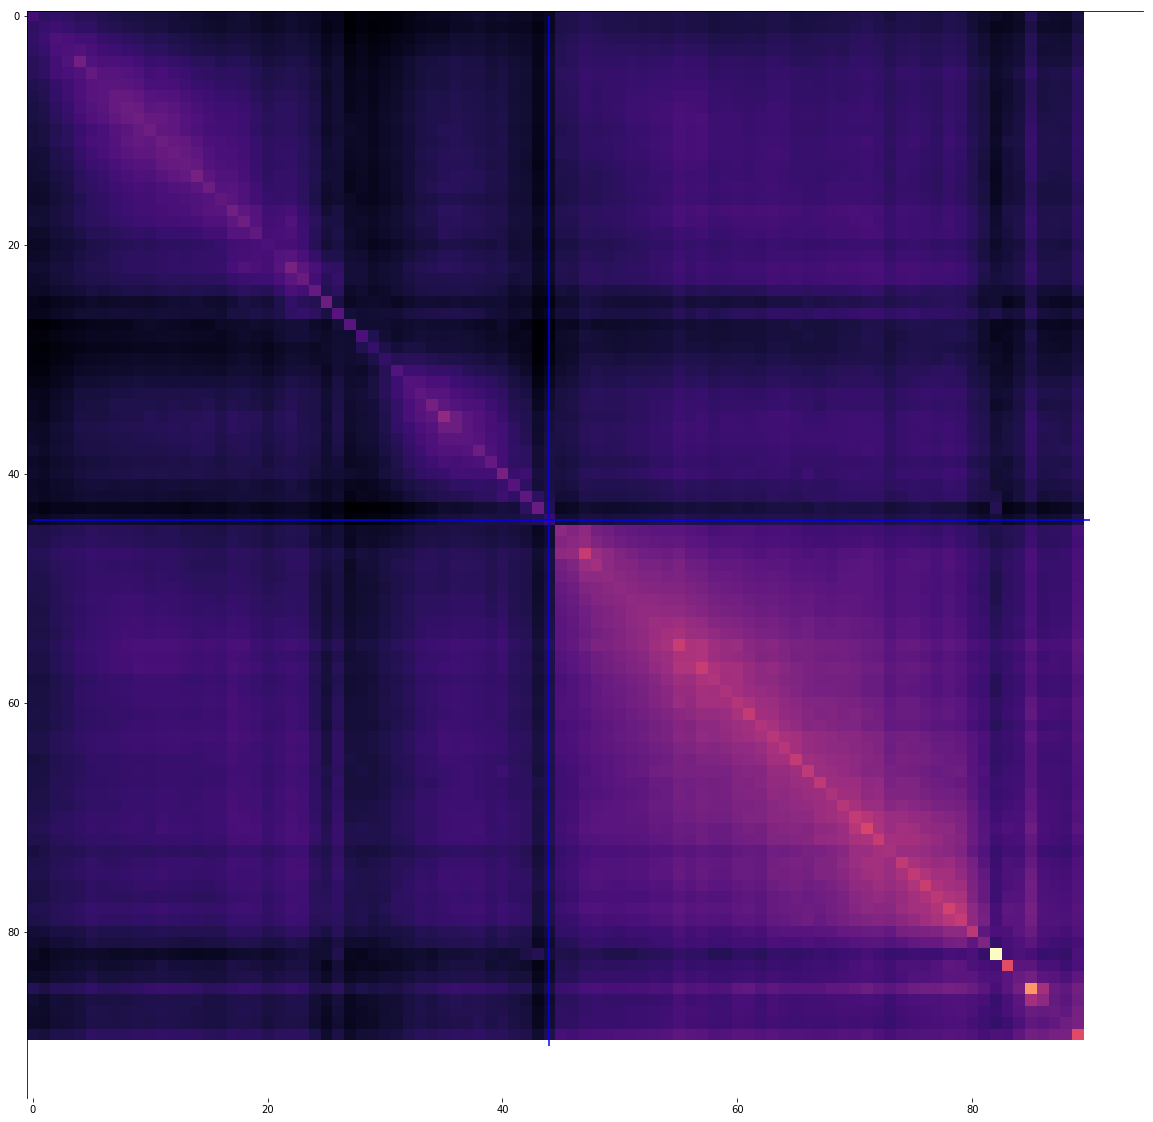

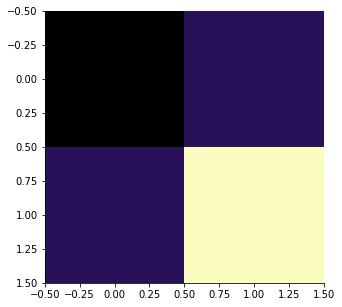

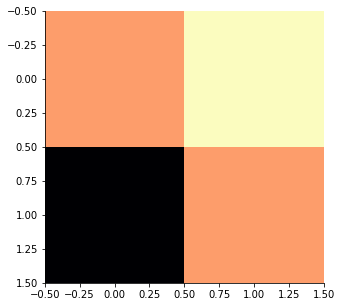

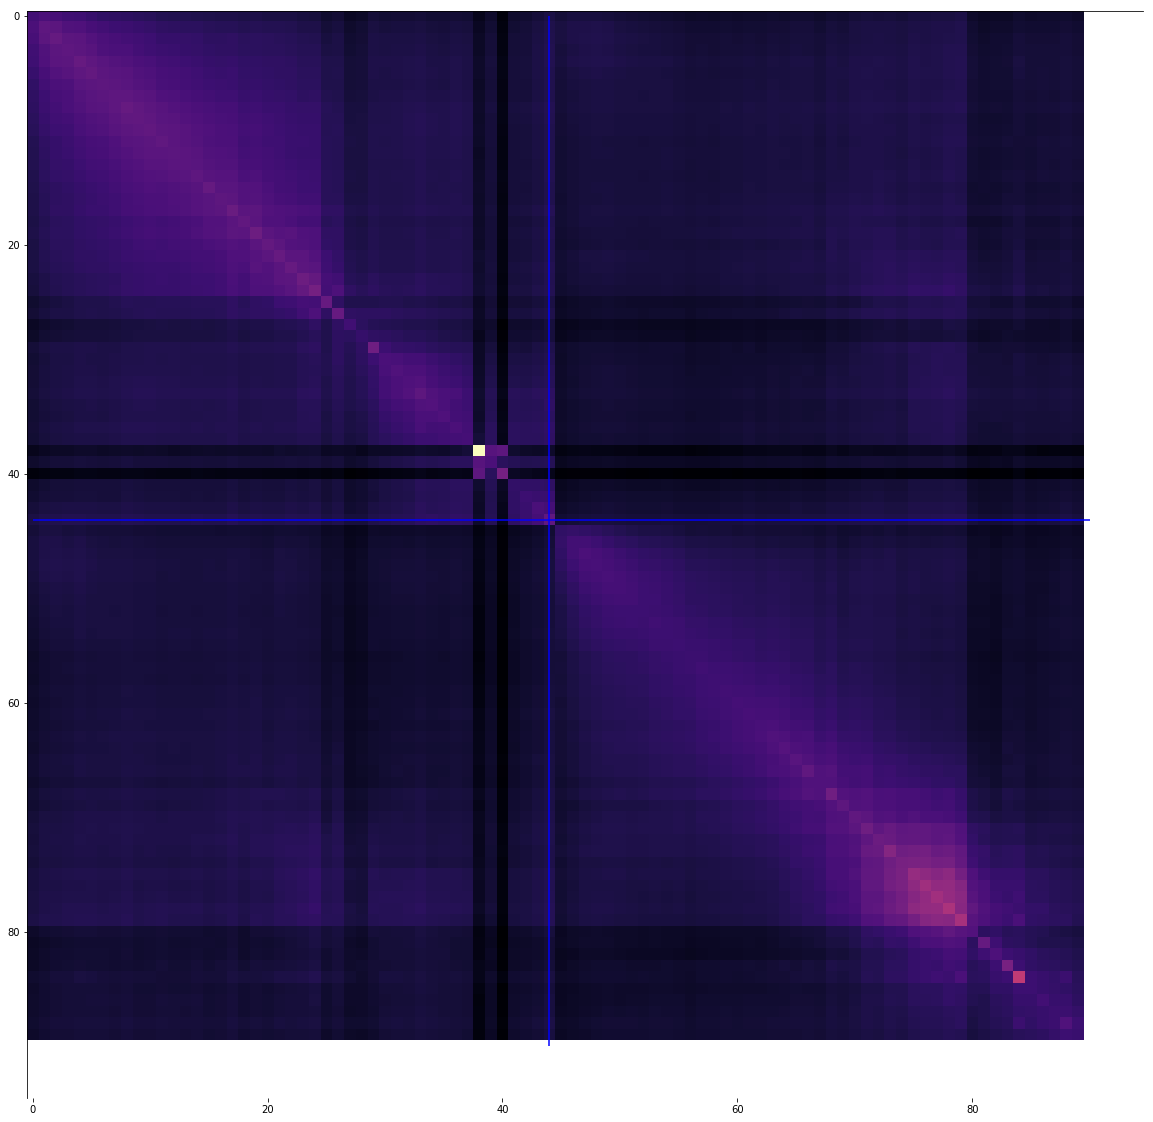

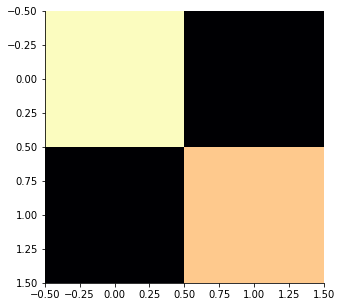

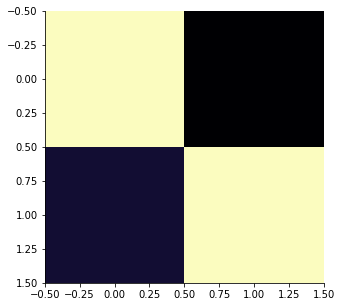

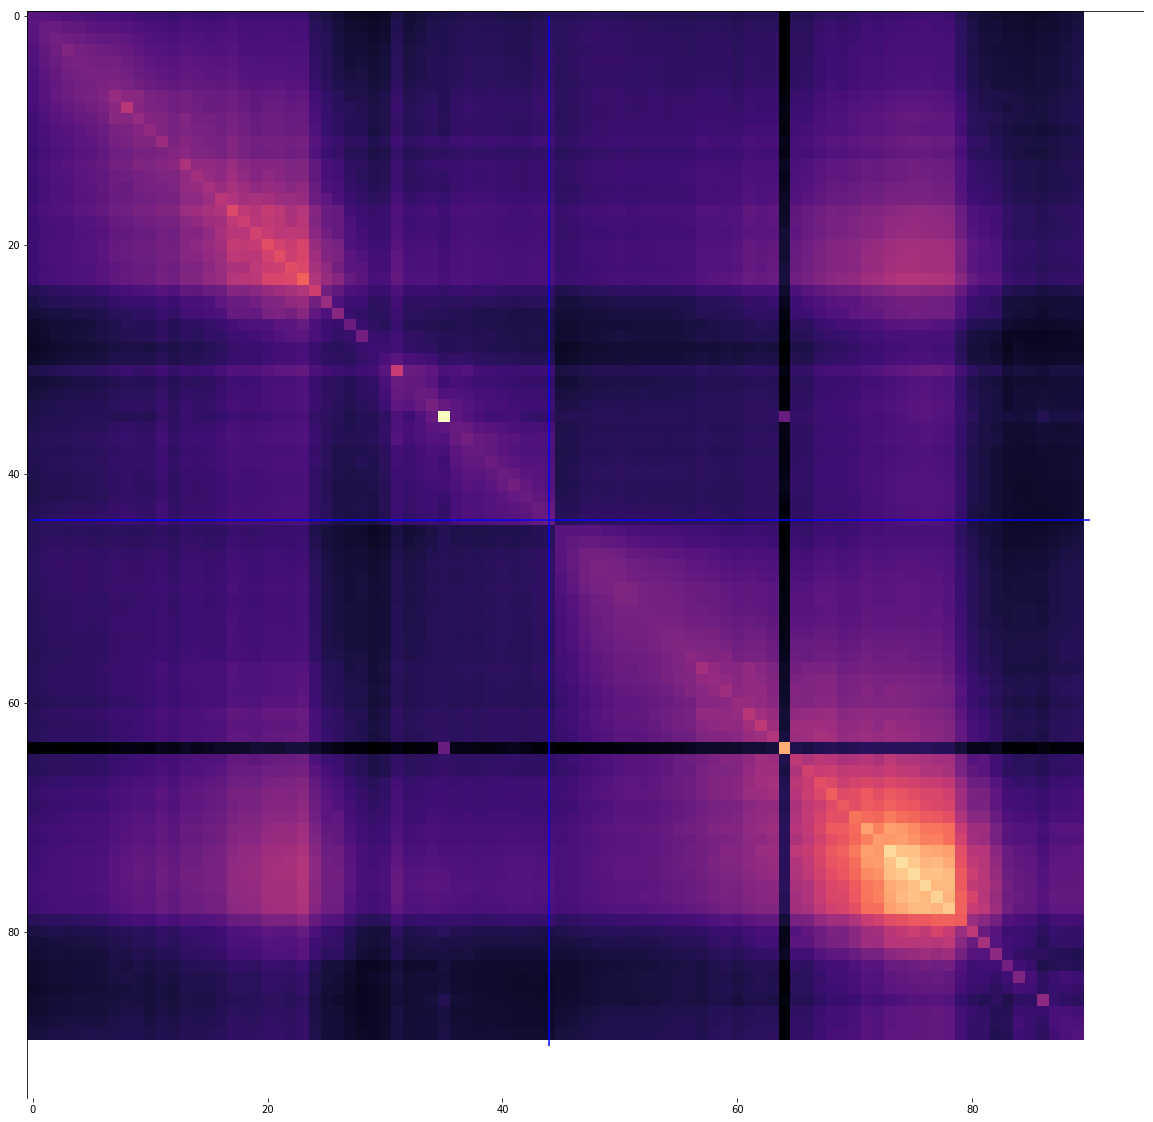

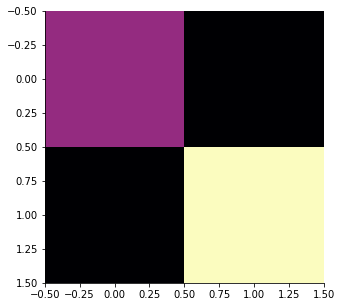

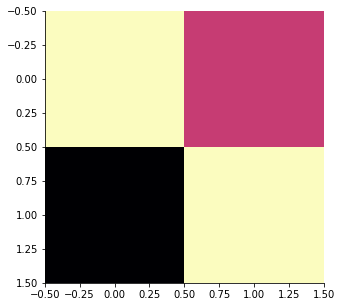

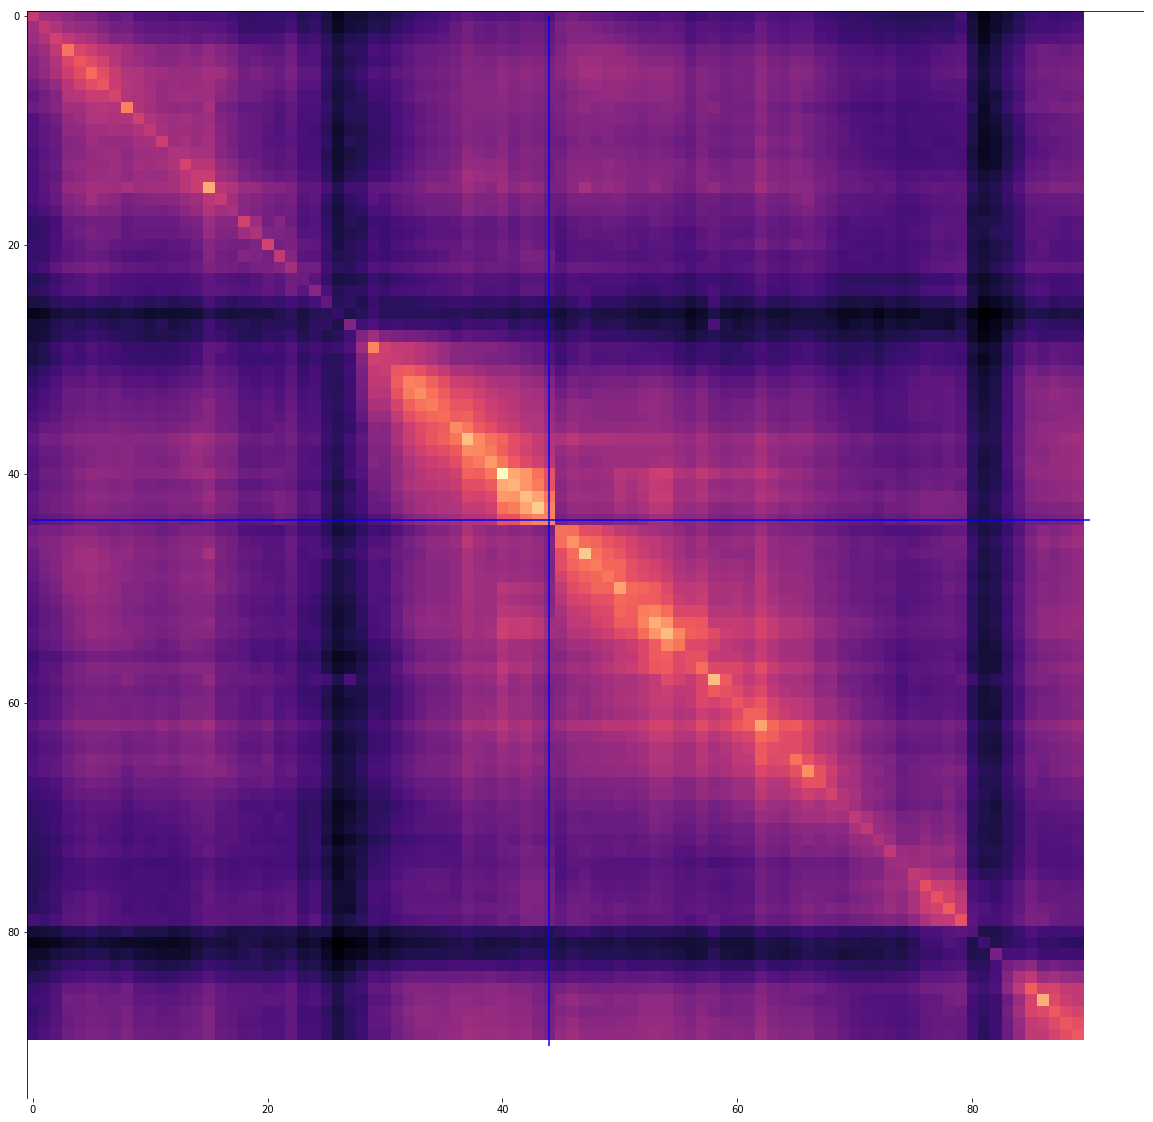

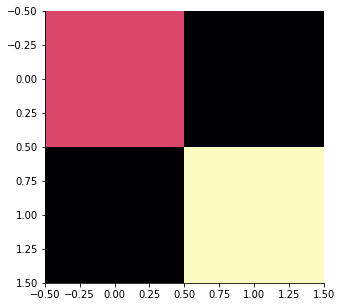

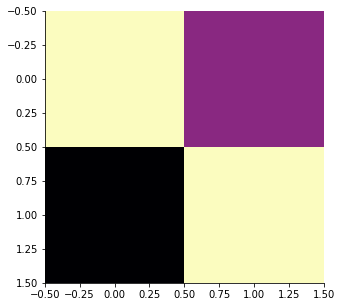

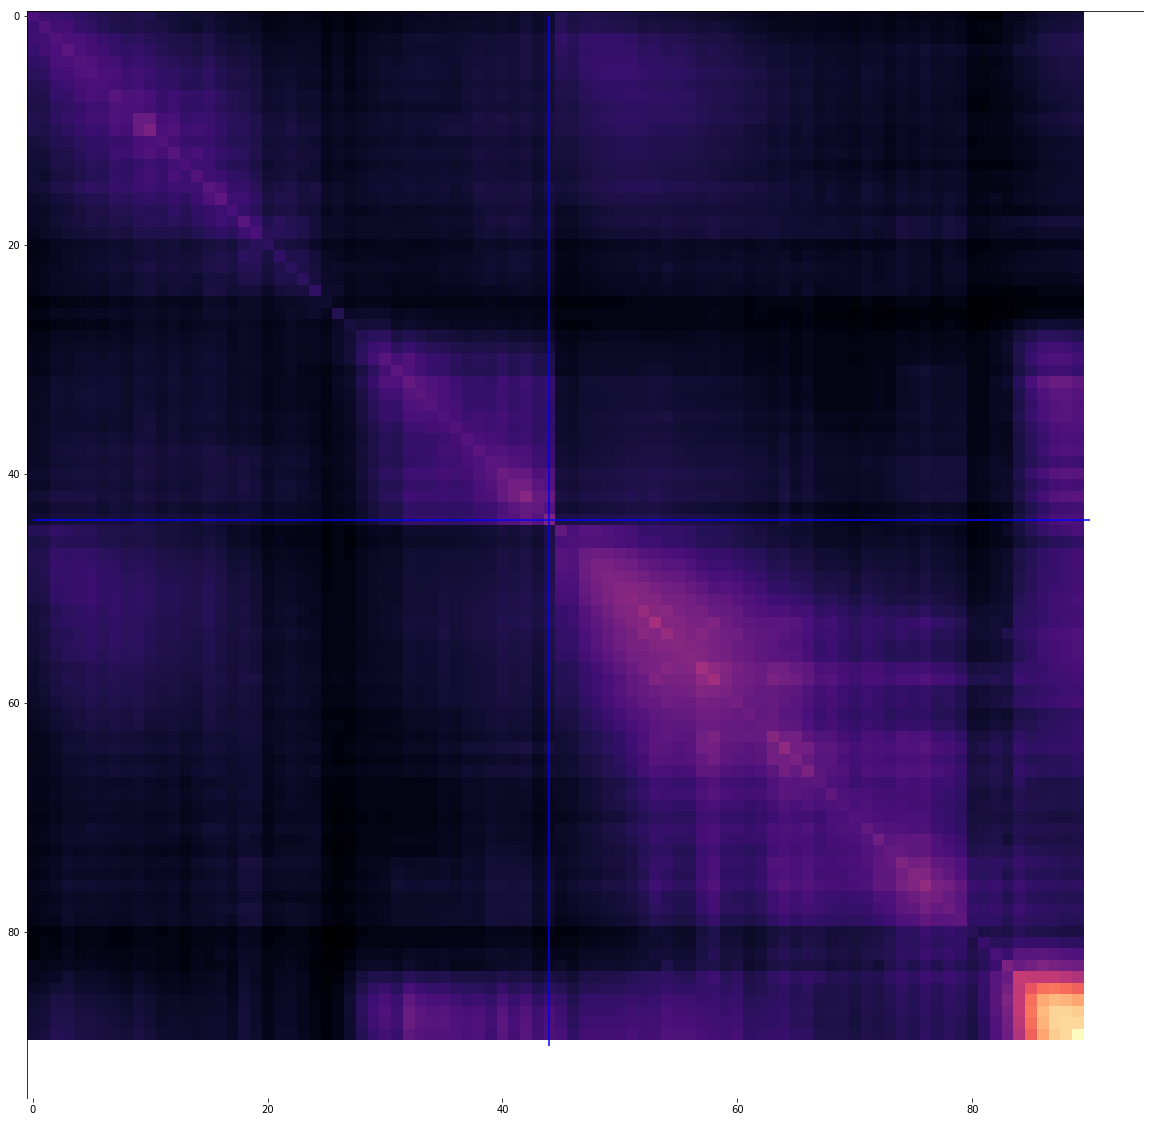

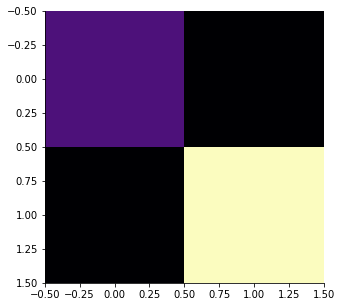

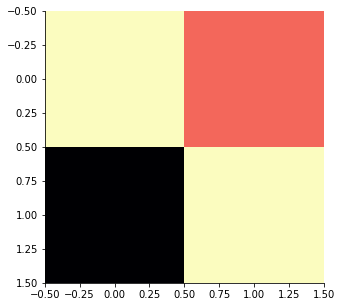

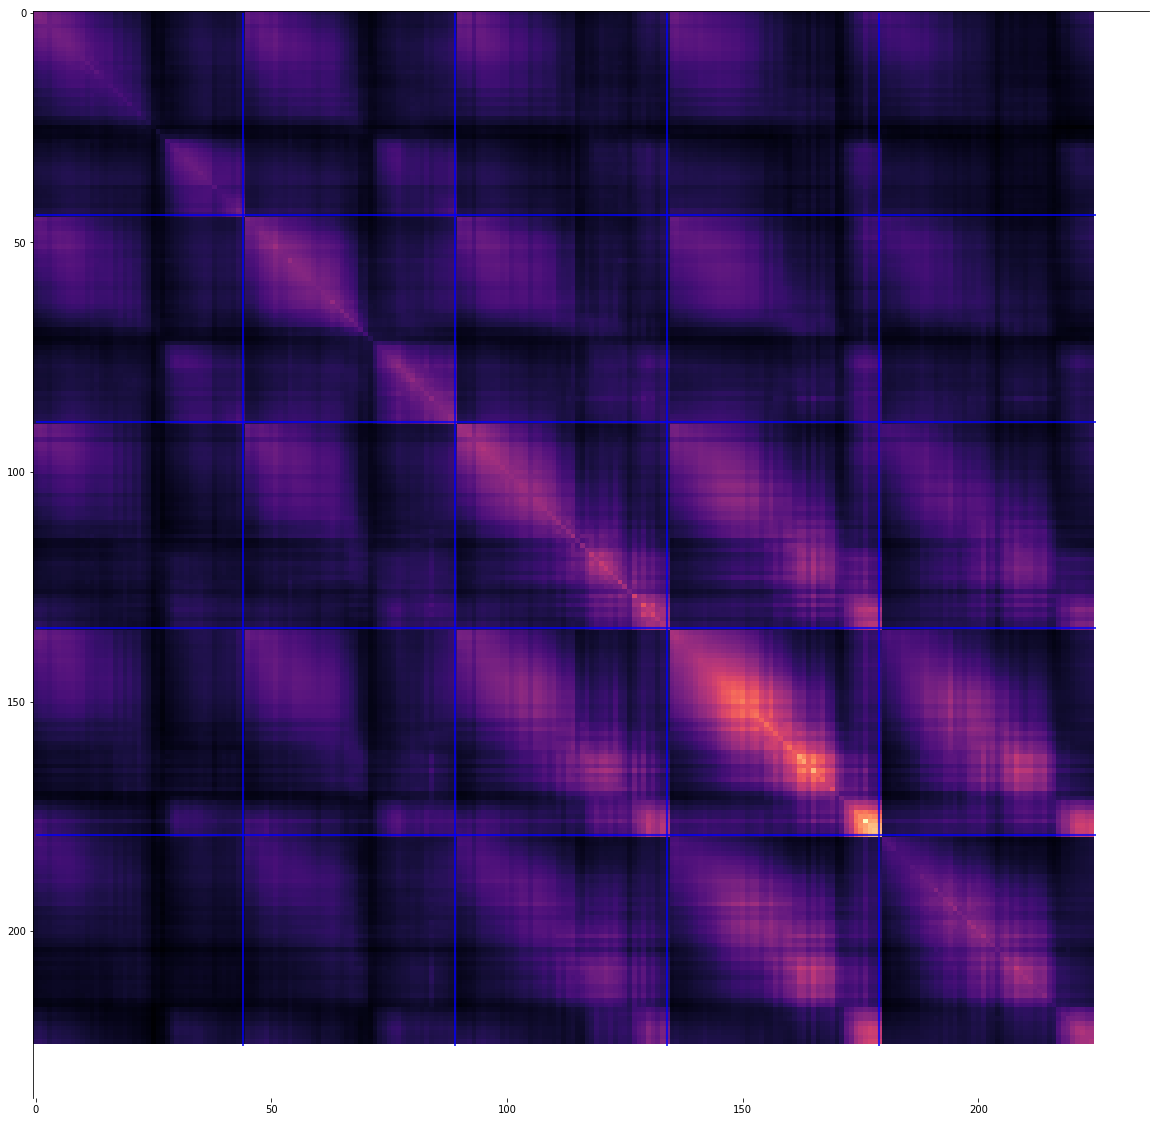

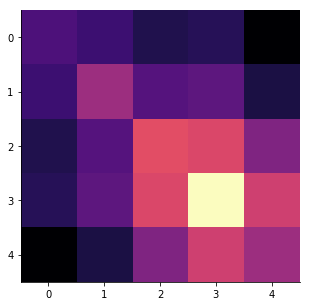

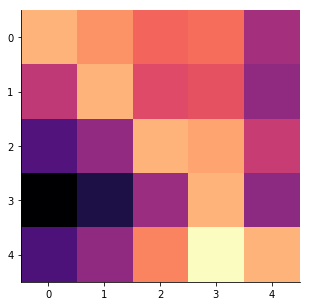

In [3]:
d_cm = {}
for mouse in ['4139190.1','4139190.3']:
    d_cm[mouse]={}
    print(mouse)
    # no timeeout 
    df_noTO = df[df['Track']=='TwoTower_noTimeout']
    df_noTO = df_noTO[df_noTO['MouseName'].str.match(mouse)]
    #df_noTO = df_noTO.iloc[:7,:]
    df_noTO = df_noTO[df_noTO['DateTime']<'2018-06-19']
    # concatenate all files
    for i in range(df_noTO.shape[0]):
        d_cm[mouse][i]={}
        sess = df_noTO.iloc[i]
        filestr = "%s_%s_%d" % (sess['DateFolder'] , sess["Track"], sess["SessionNumber"])
        #print(sess)
        data_noTO = behavior_dataframe(sess['data file'],scanmats=sess['scanmat'],concat=False)
        info = loadmat_sbx(sess['scanmat'])['info']
        ca_dat = load_ca_mat(sess['scanfile'])

        C = ca_dat['C_dec'][info['frame'][0]:info['frame'][-1]+1]
        S = ca_dat['S_dec'][info['frame'][0]:info['frame'][-1]+1]

        frame_diff = data_noTO.shape[0]-C.shape[0]
        #print(frame_diff)
        if frame_diff>0:
            data_noTO = data_noTO.iloc[:-frame_diff]


        C_z = sp.stats.zscore(C,axis=0)
        S_z = sp.stats.zscore(S,axis=0)
        S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
        S_smooth = gaussian_filter1d(S,3,axis=0)

        simmat,cm,cm_norm=run_simmat(C,data_noTO,save=True,fbase = "G:\\My Drive\\CommitteeMeeting8_18\\SimMats\\%s" % mouse,filestr=filestr)
        d_cm[mouse][i]['simmat'] = simmat
        d_cm[mouse][i]['cm'] = cm
        d_cm[mouse][i]['cm_norm'] = cm_norm

4139190.1
G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 1431)
(45, 1431)
G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2018\TwoTower_Timeout\TwoTower_Timeout_3_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2018\TwoTower_Timeout\TwoTower_Timeout_3_000.mat
#subsystem#not made into numpy array
(45, 1665)
(45, 1665)
(45, 1665)
(45, 1665)
(45, 1665)
G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 1637)
(45, 1637)
(45, 1637)
(45, 1637)
(45, 1637)
G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
G:\My D

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4139190.3
G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 729)
(45, 729)
G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 789)
(45, 789)
(45, 789)
(45, 789)
(45, 789)
G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array
(45, 714)
(45, 714)
(45, 714)
(45, 714)
(45, 714)
G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsys

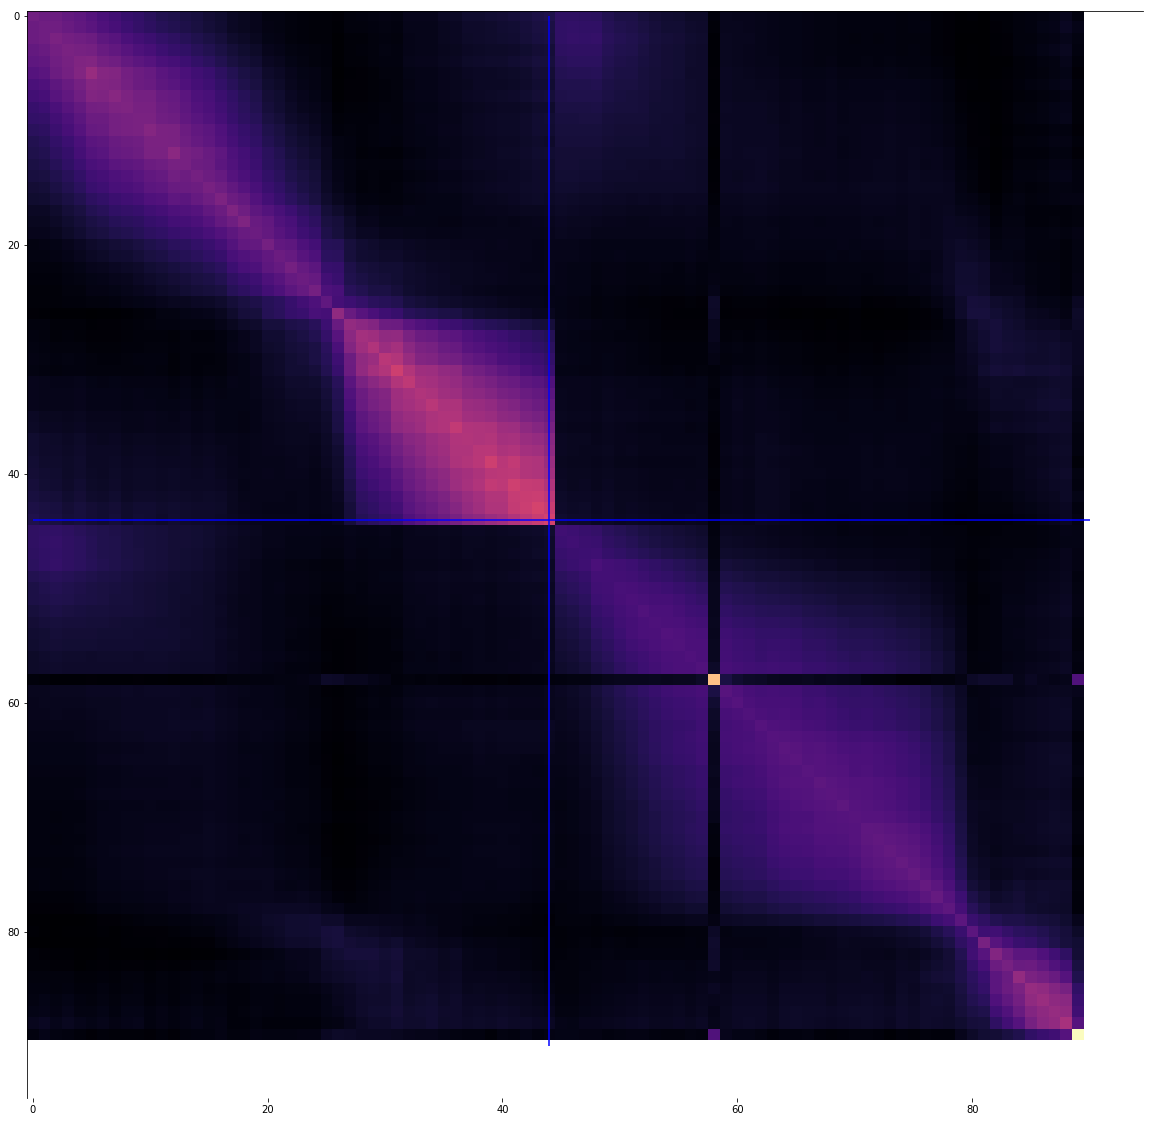

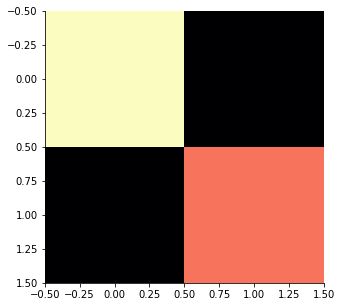

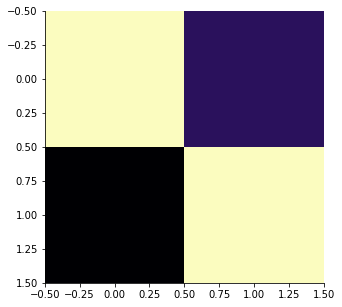

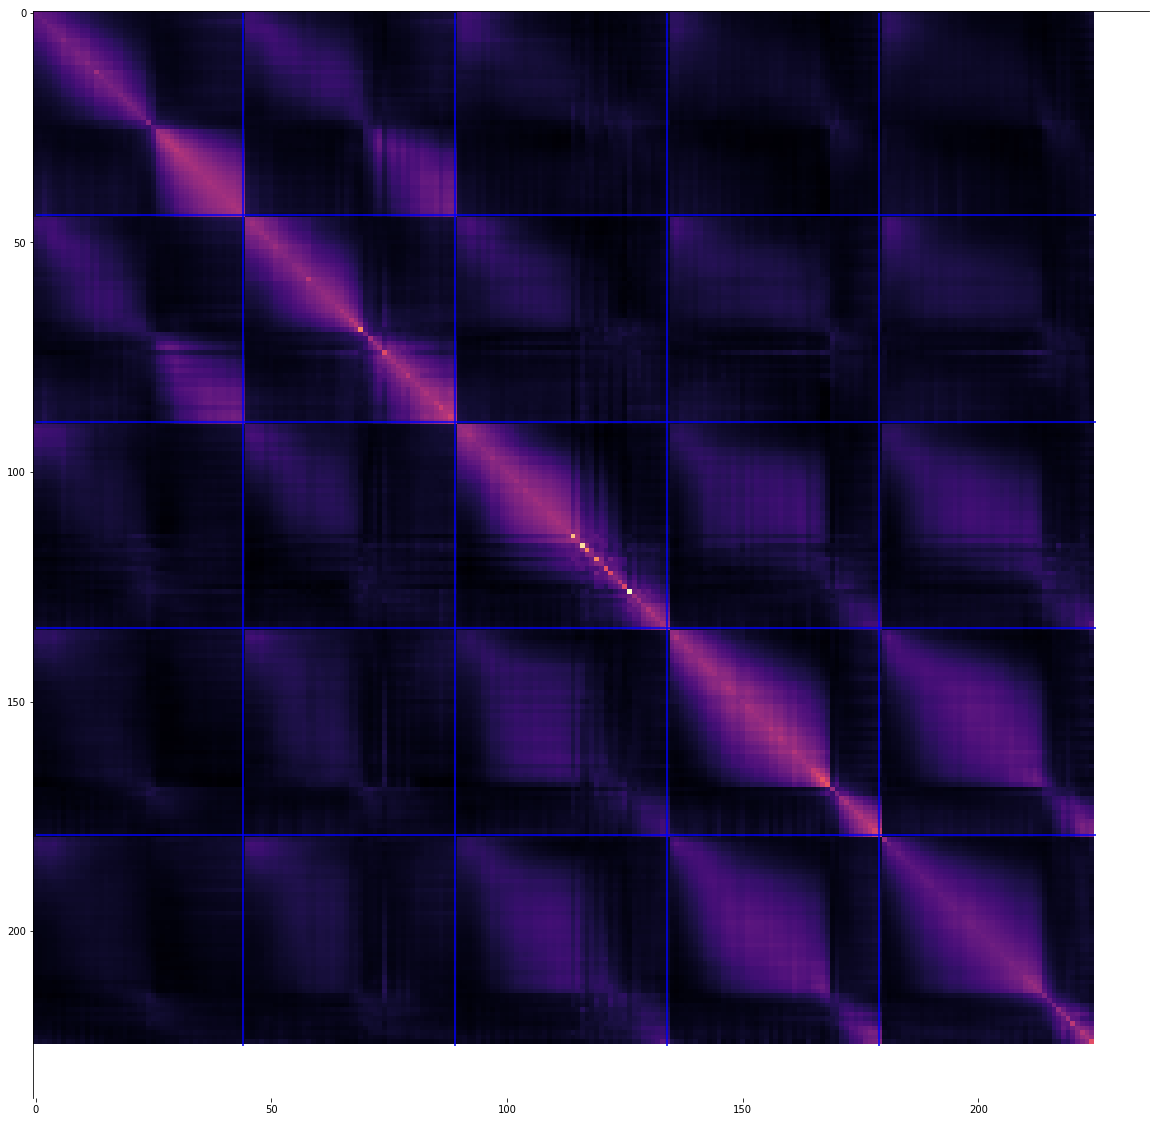

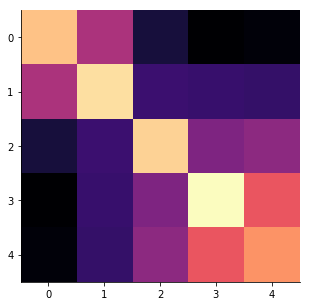

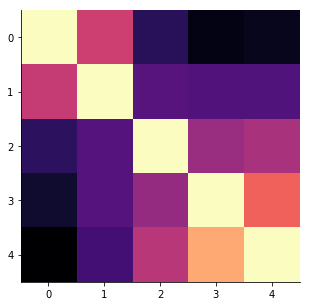

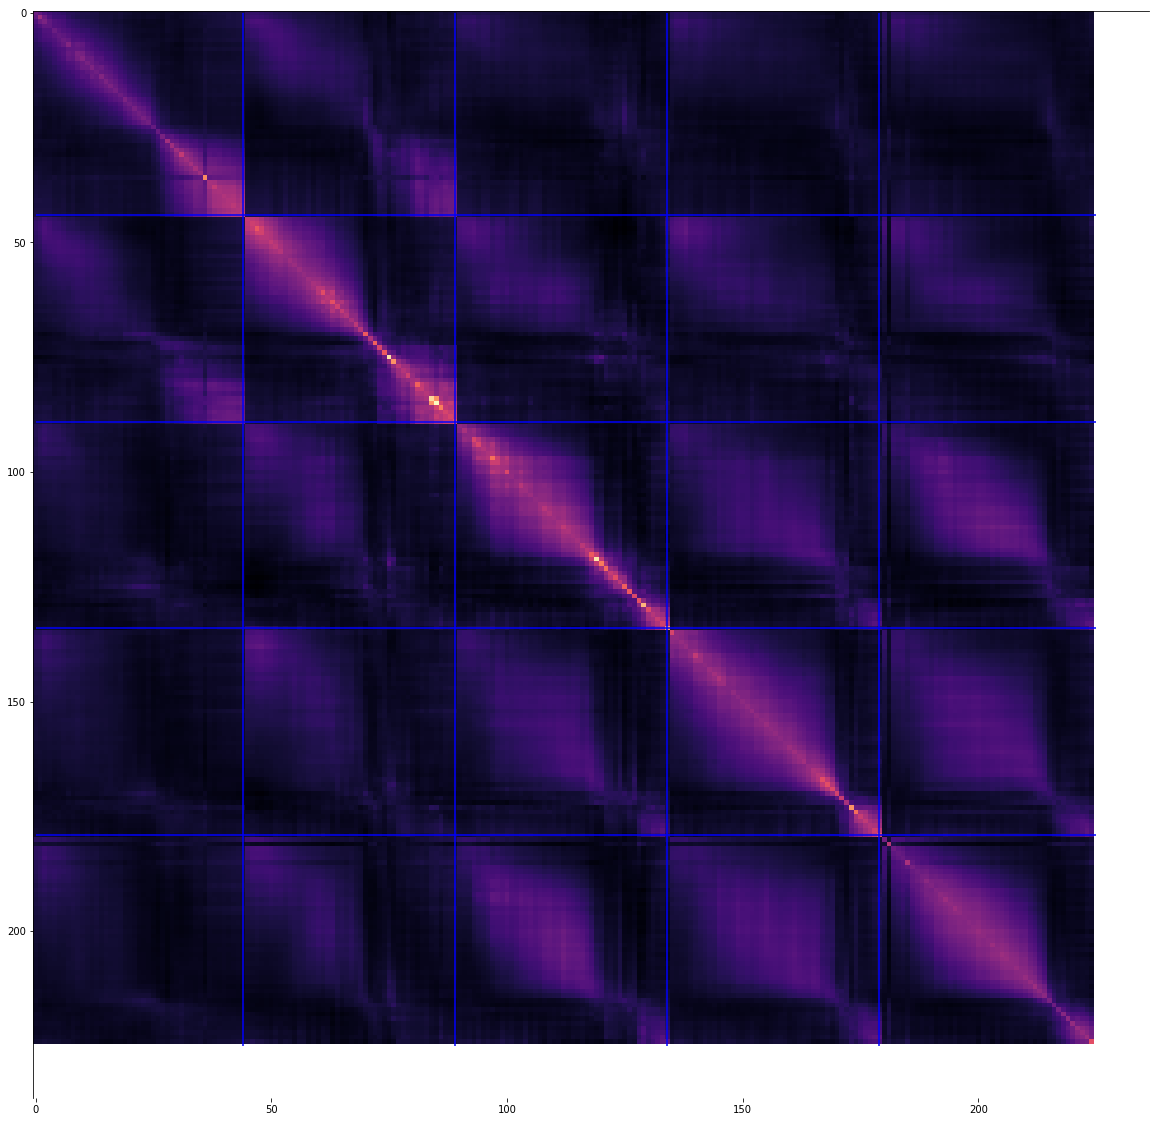

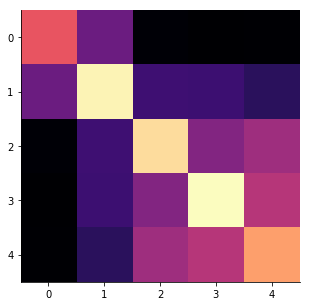

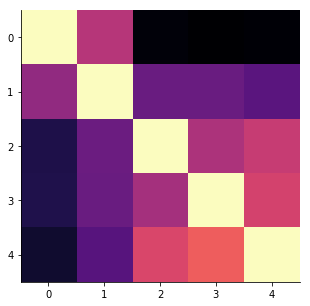

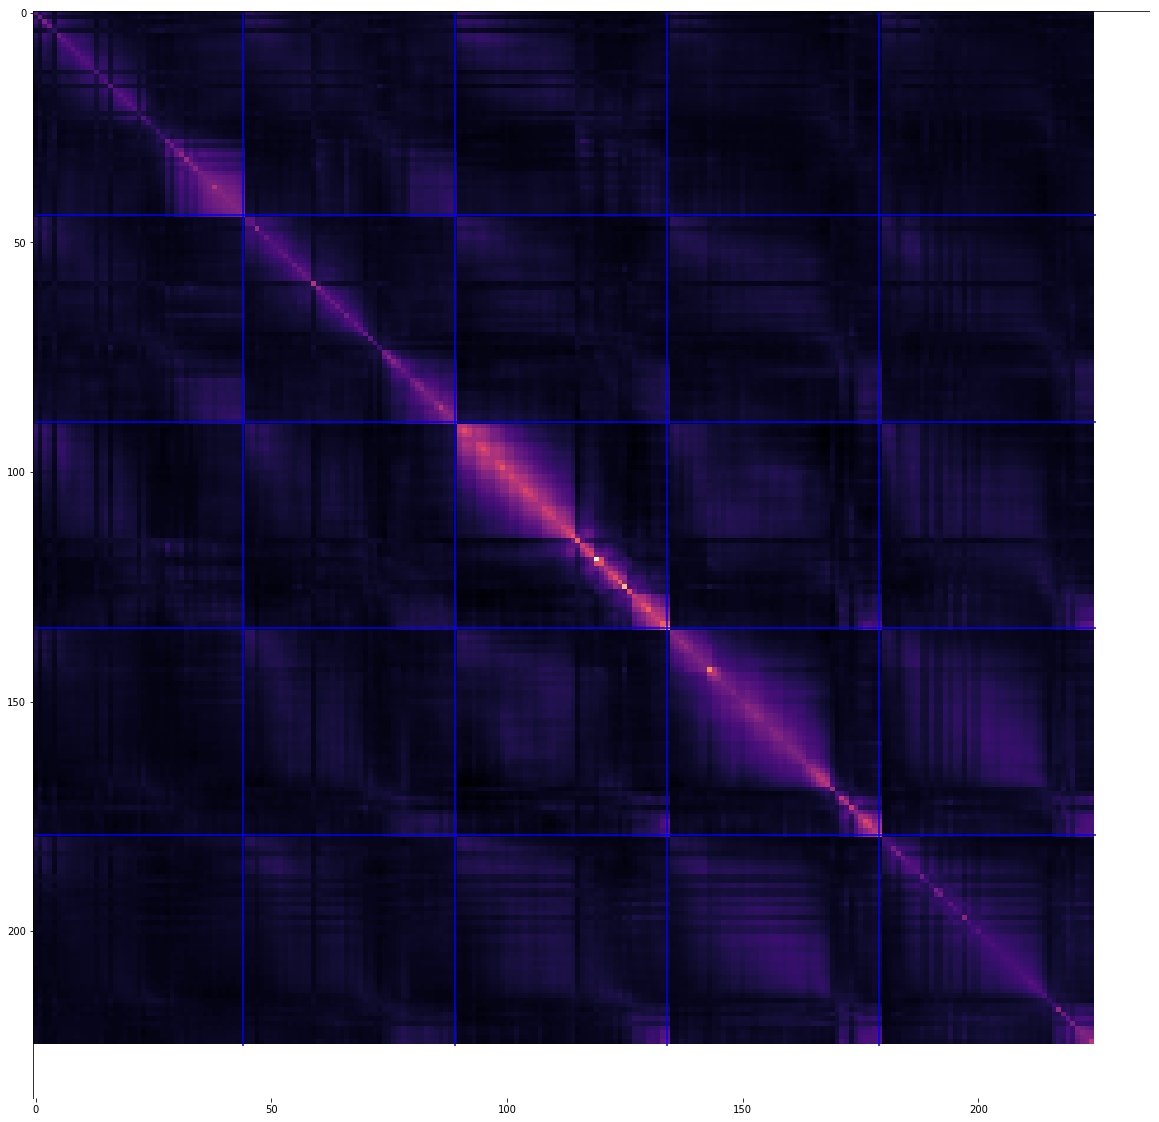

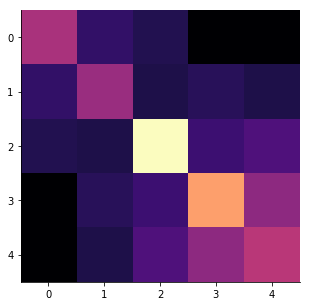

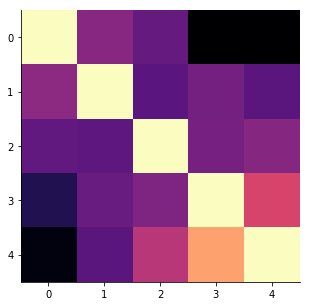

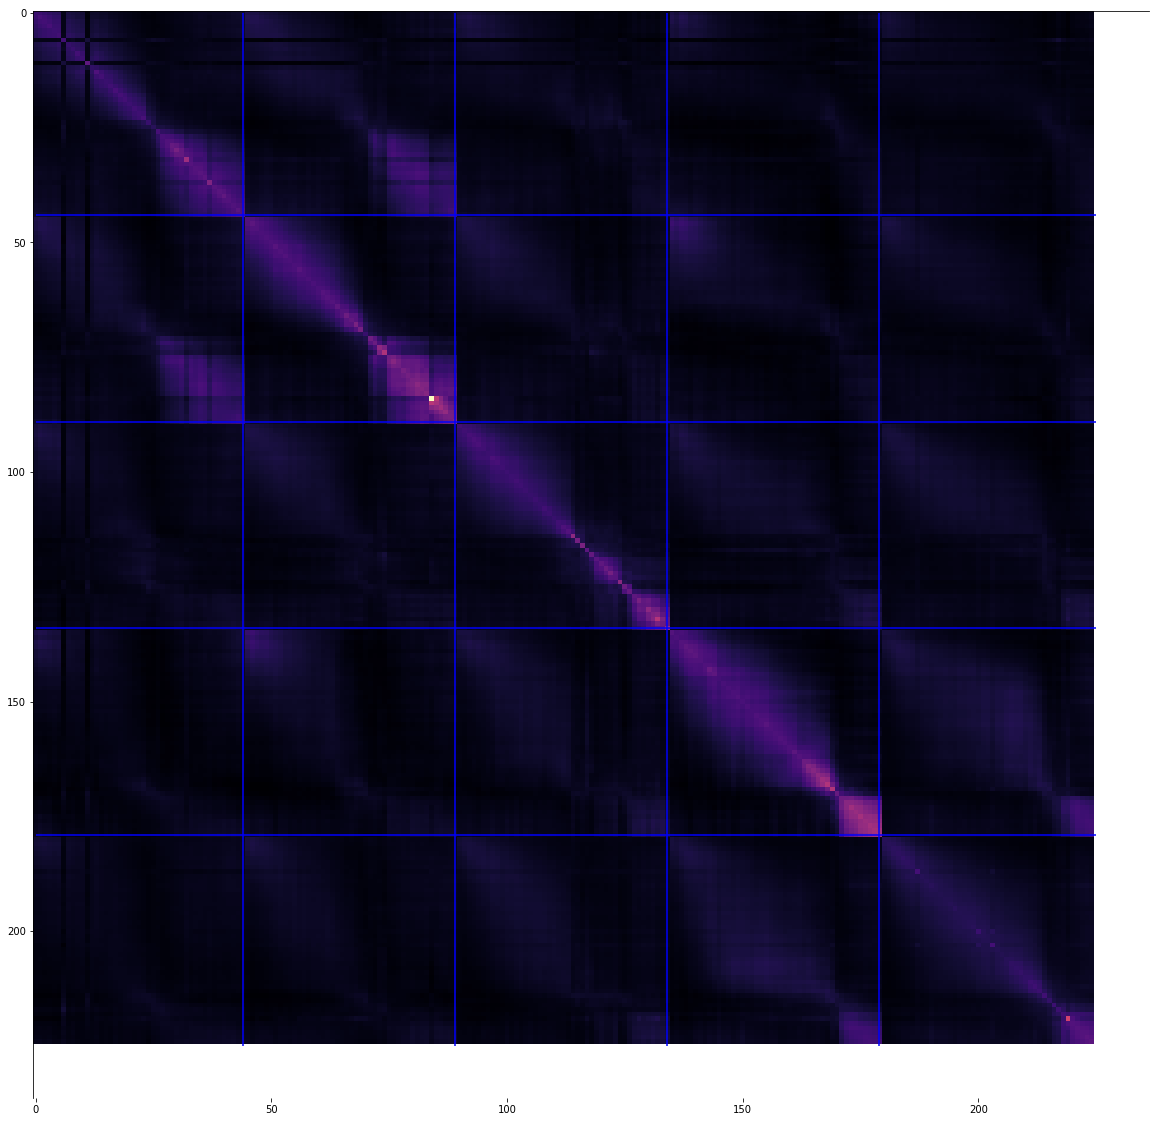

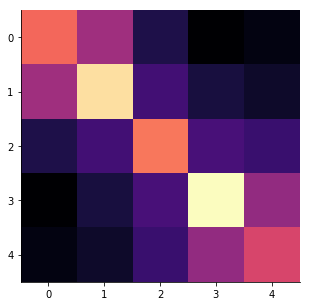

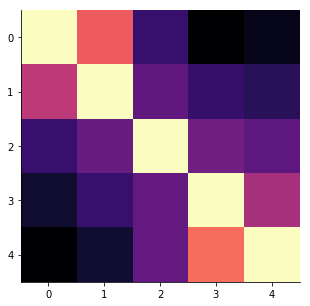

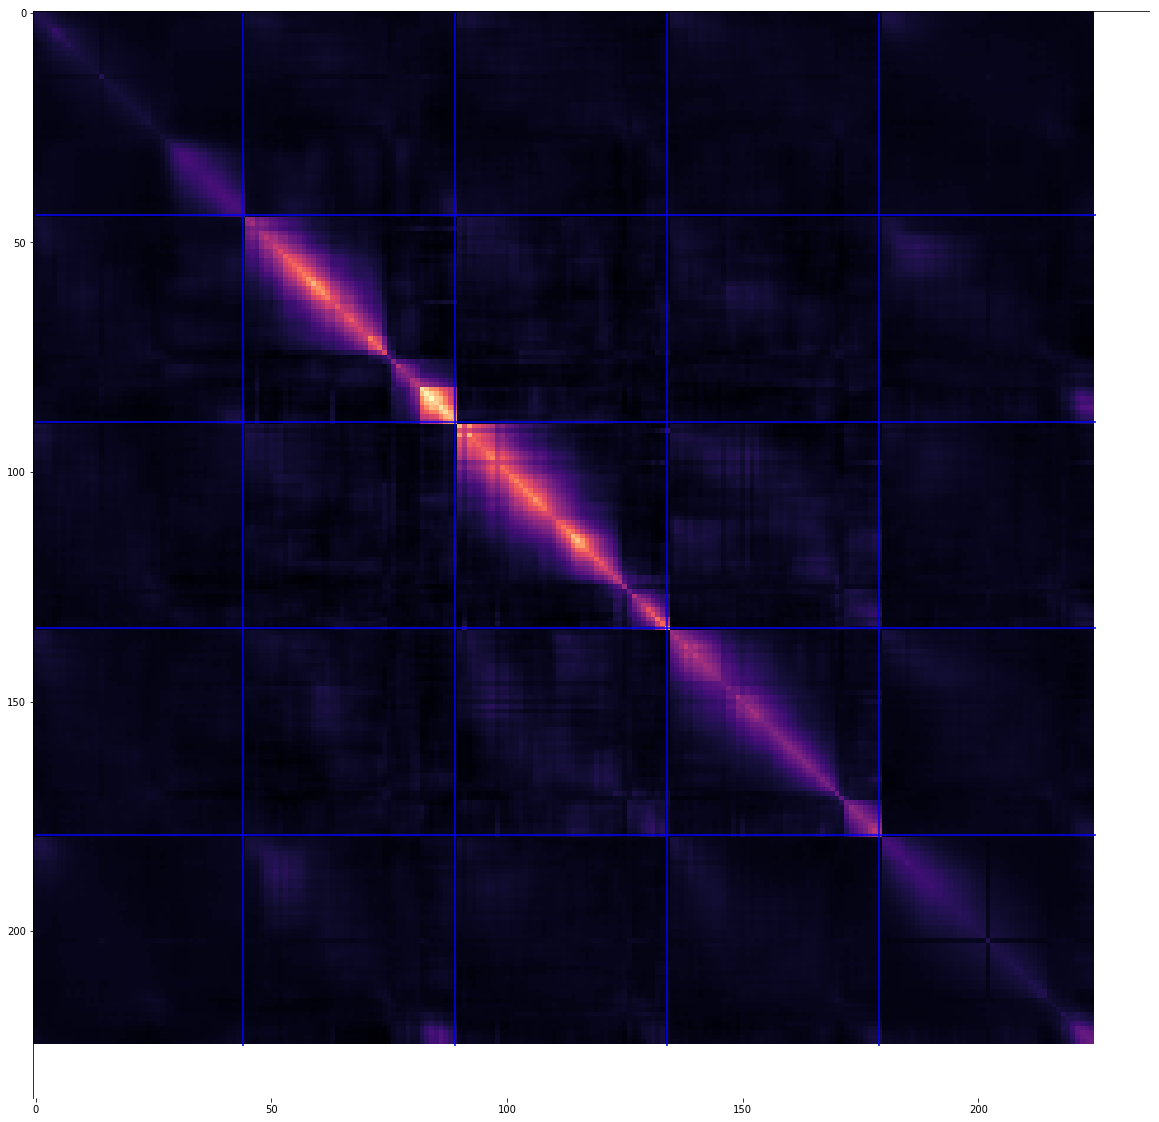

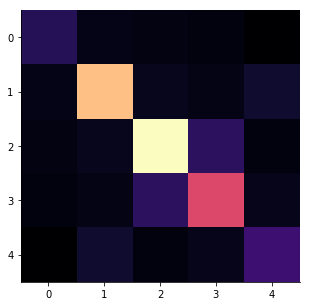

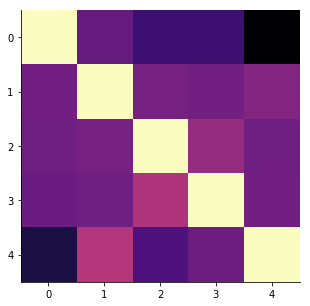

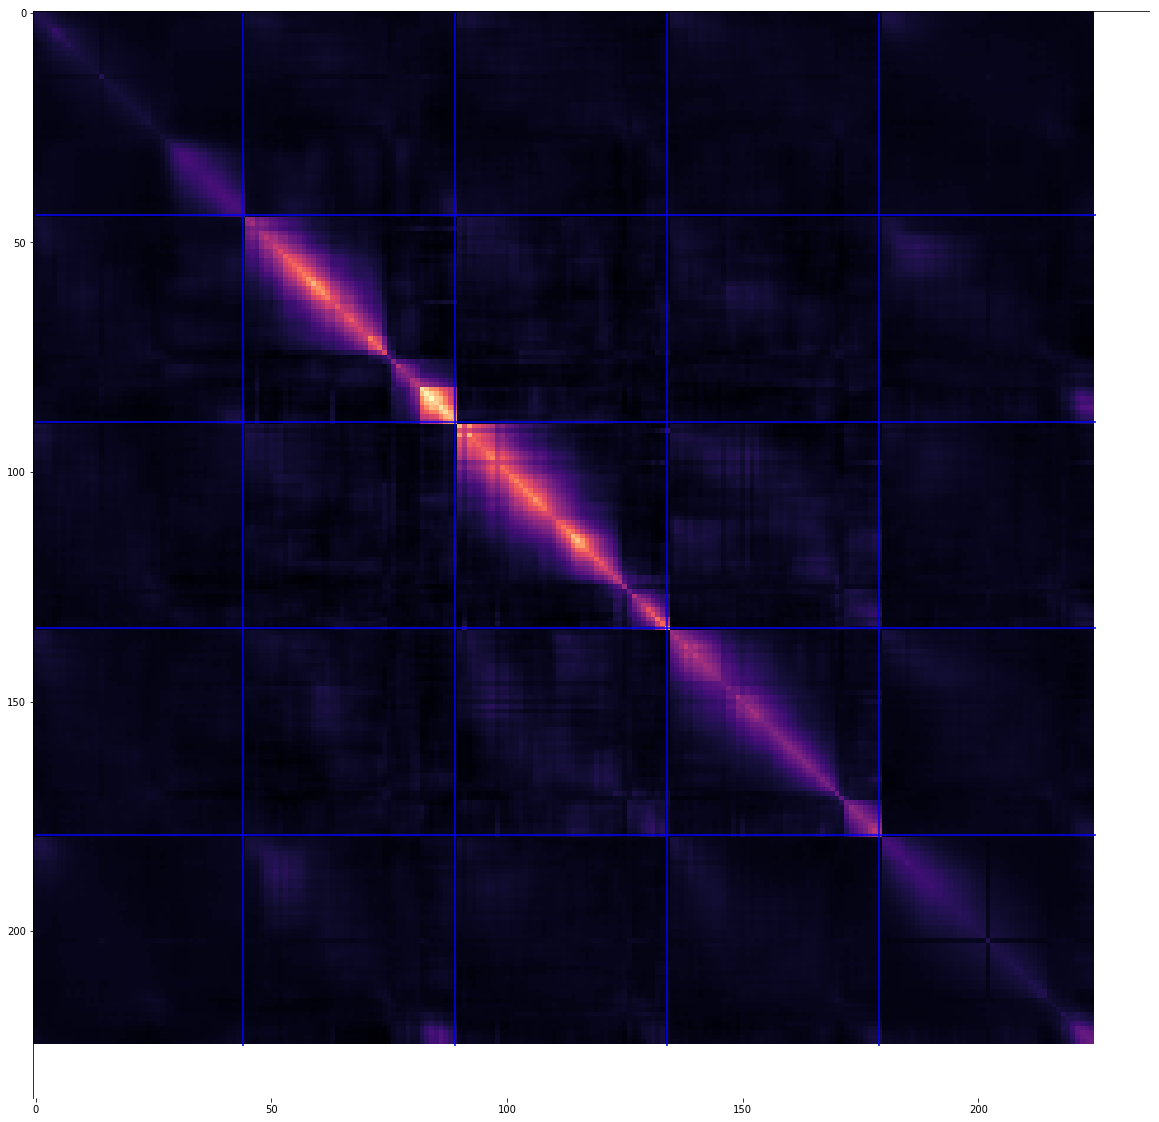

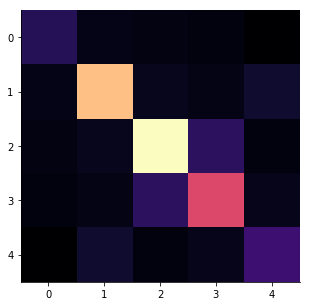

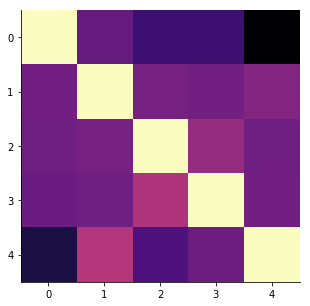

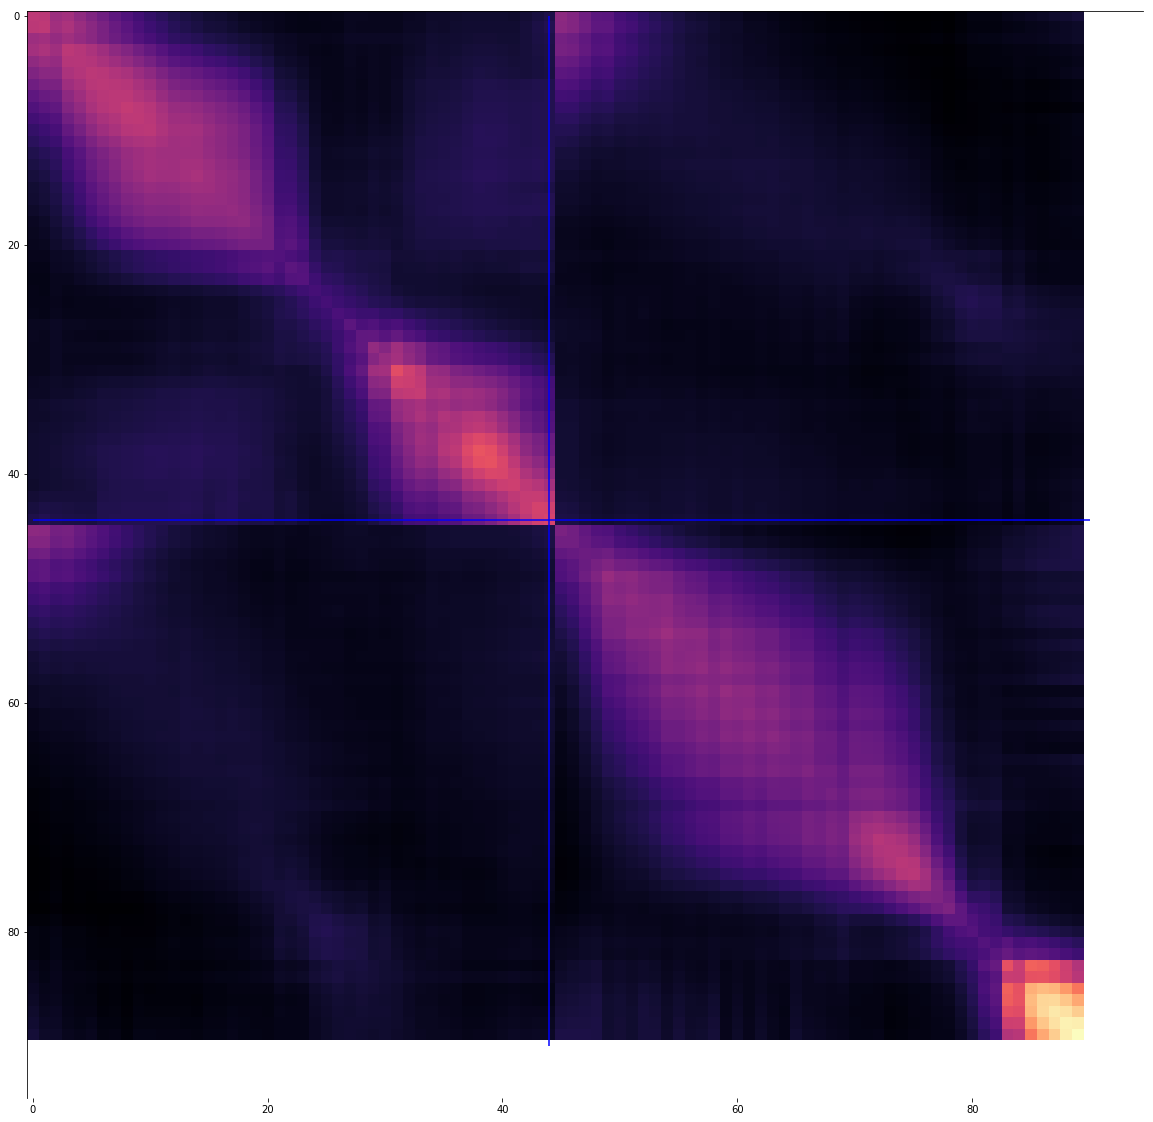

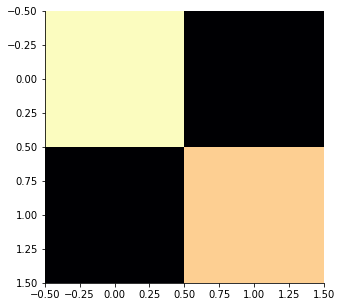

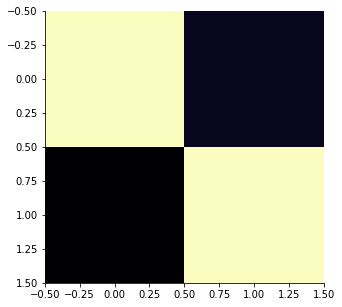

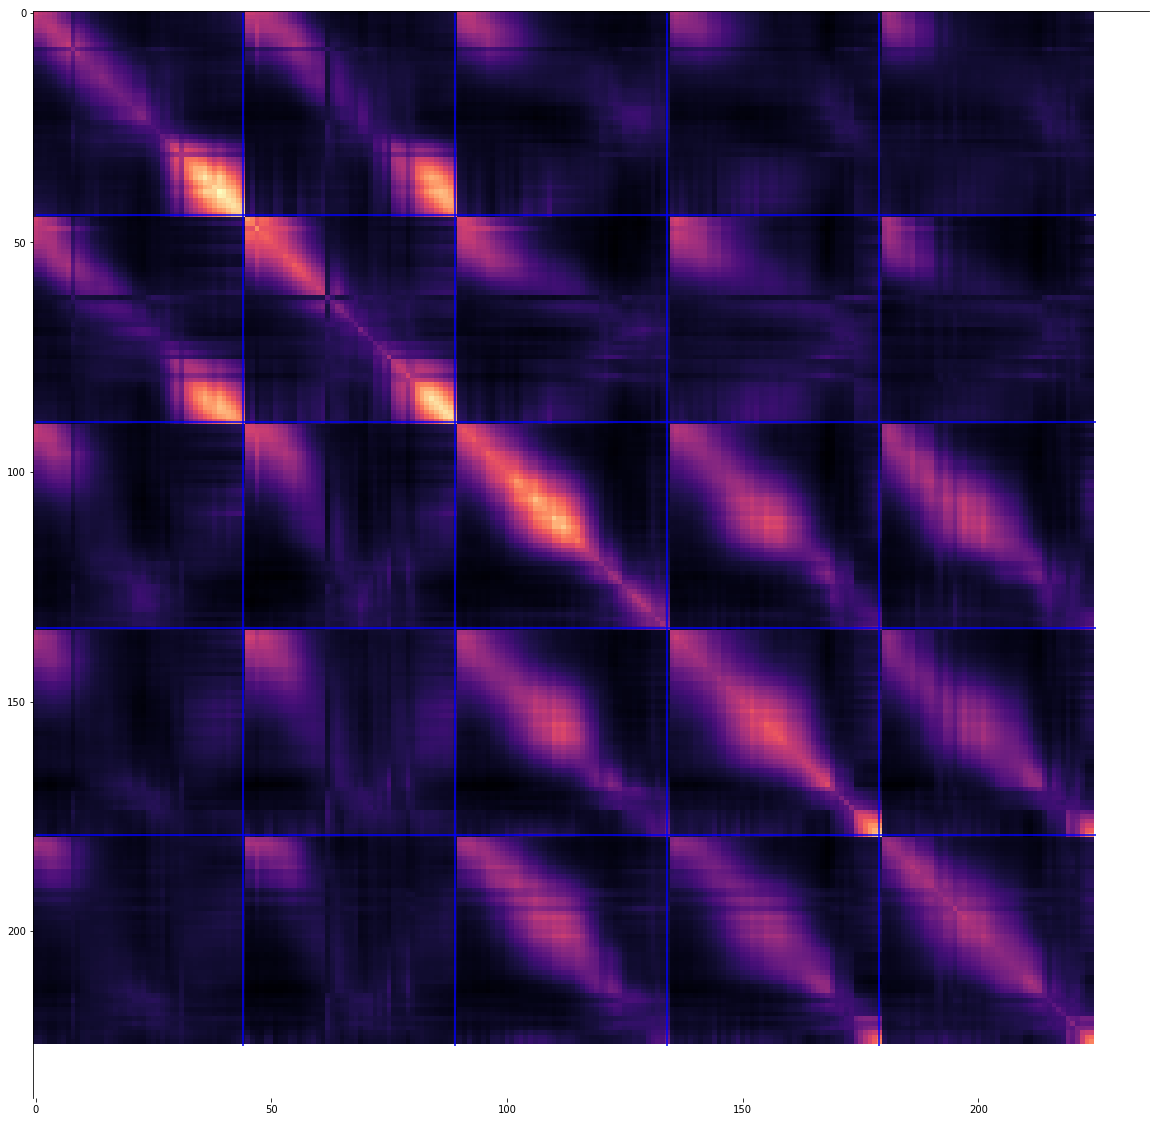

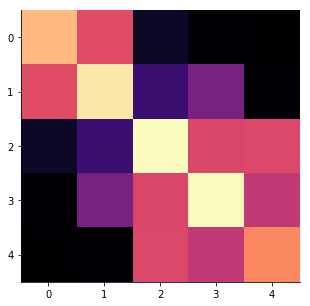

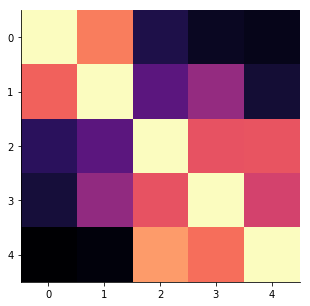

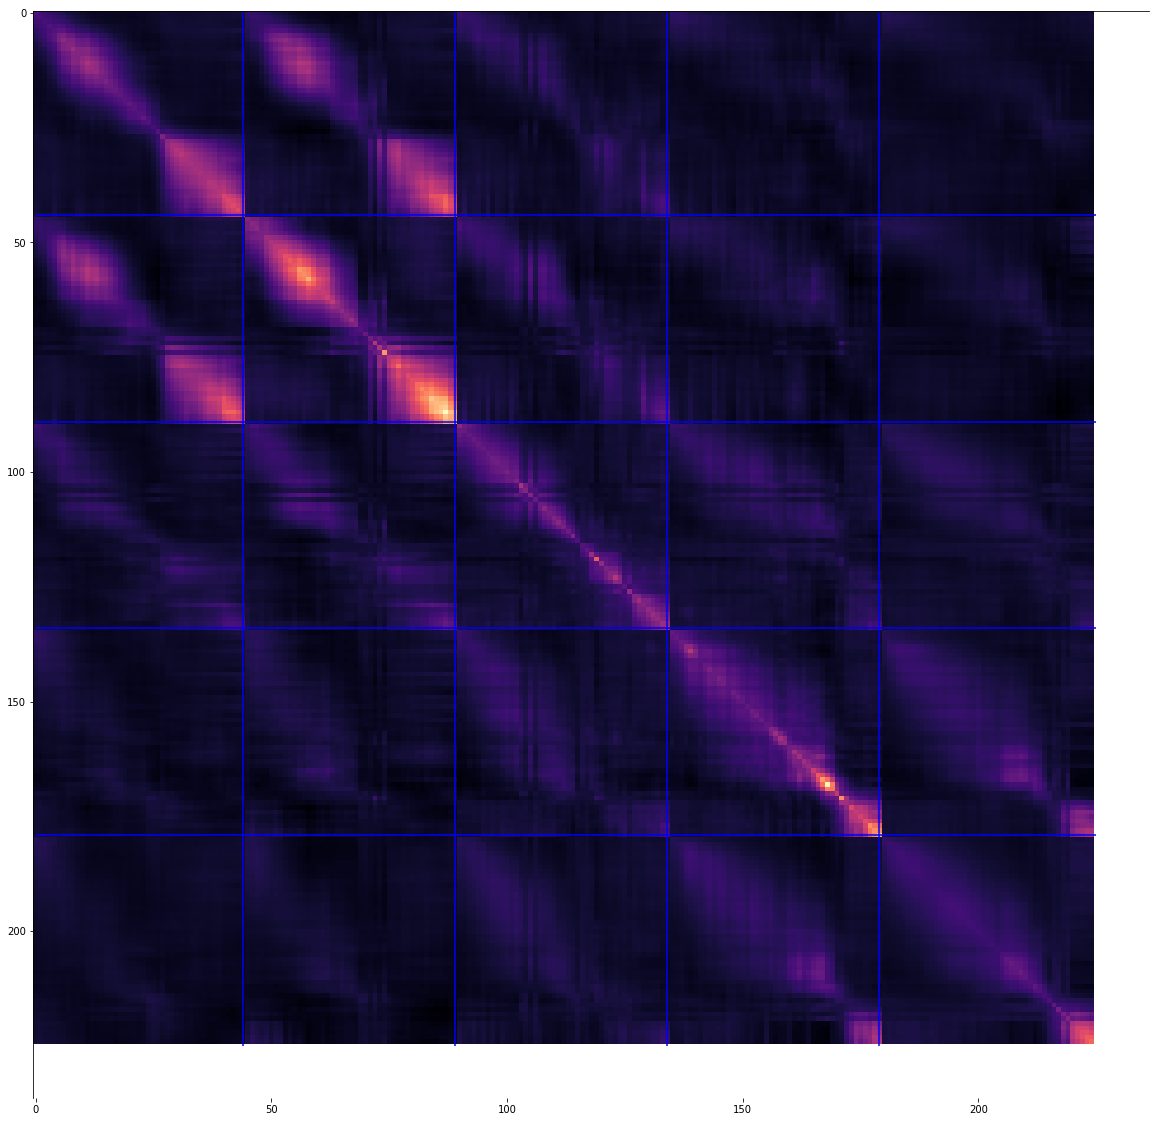

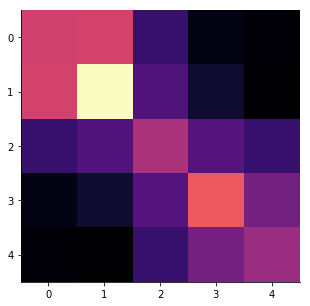

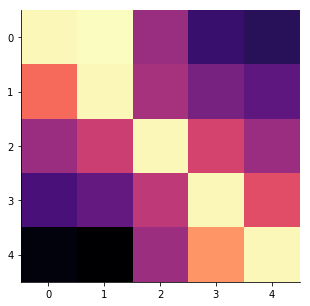

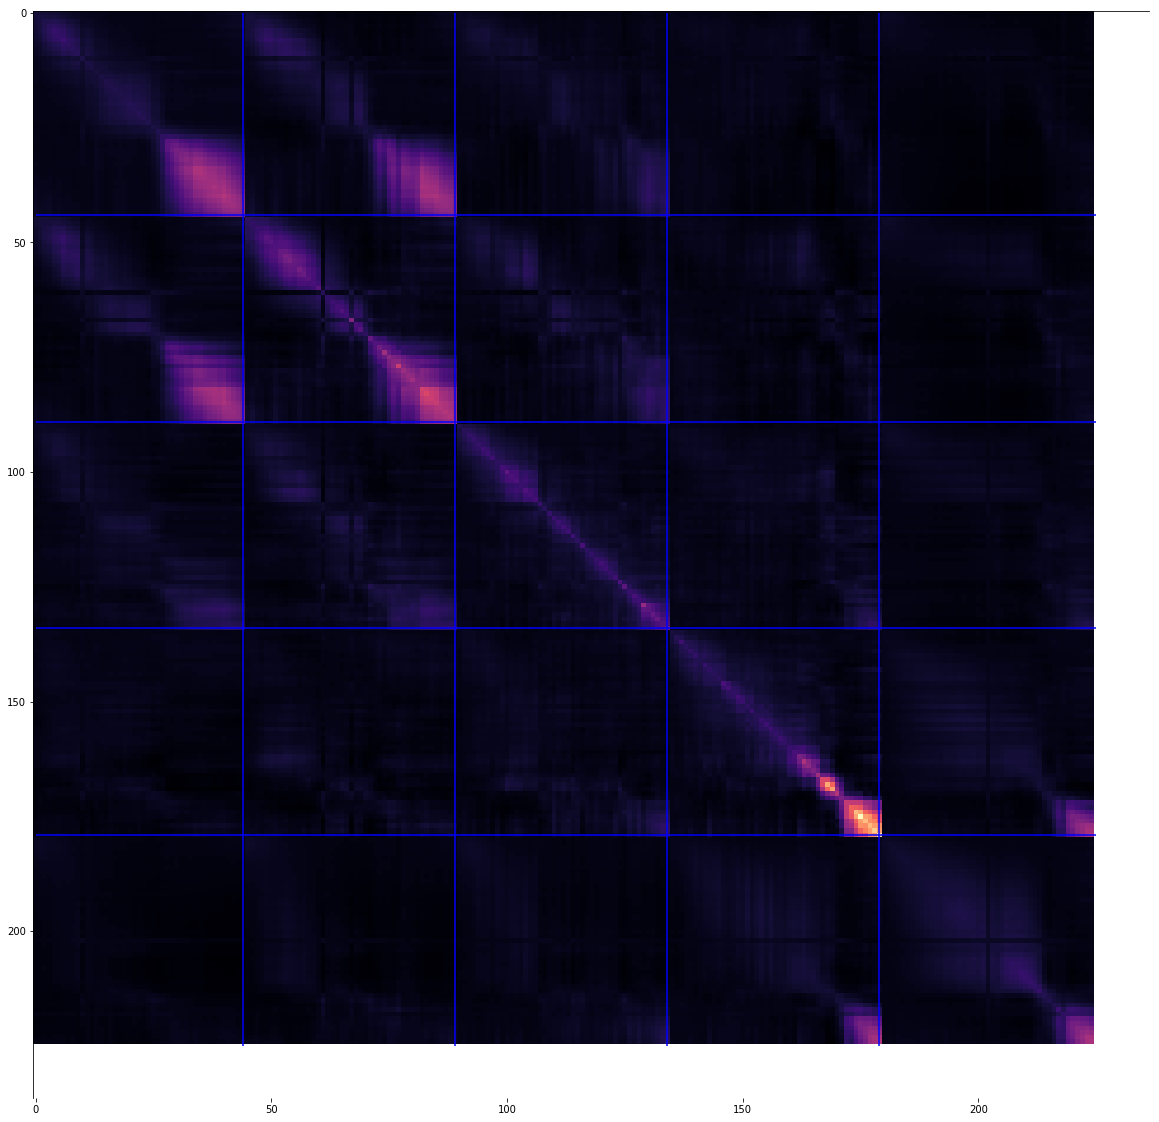

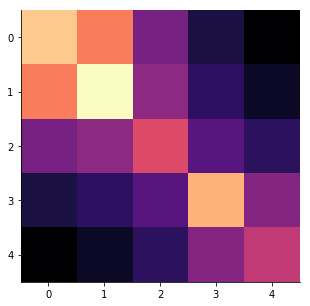

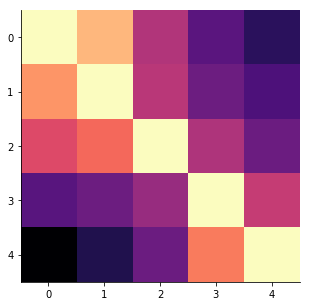

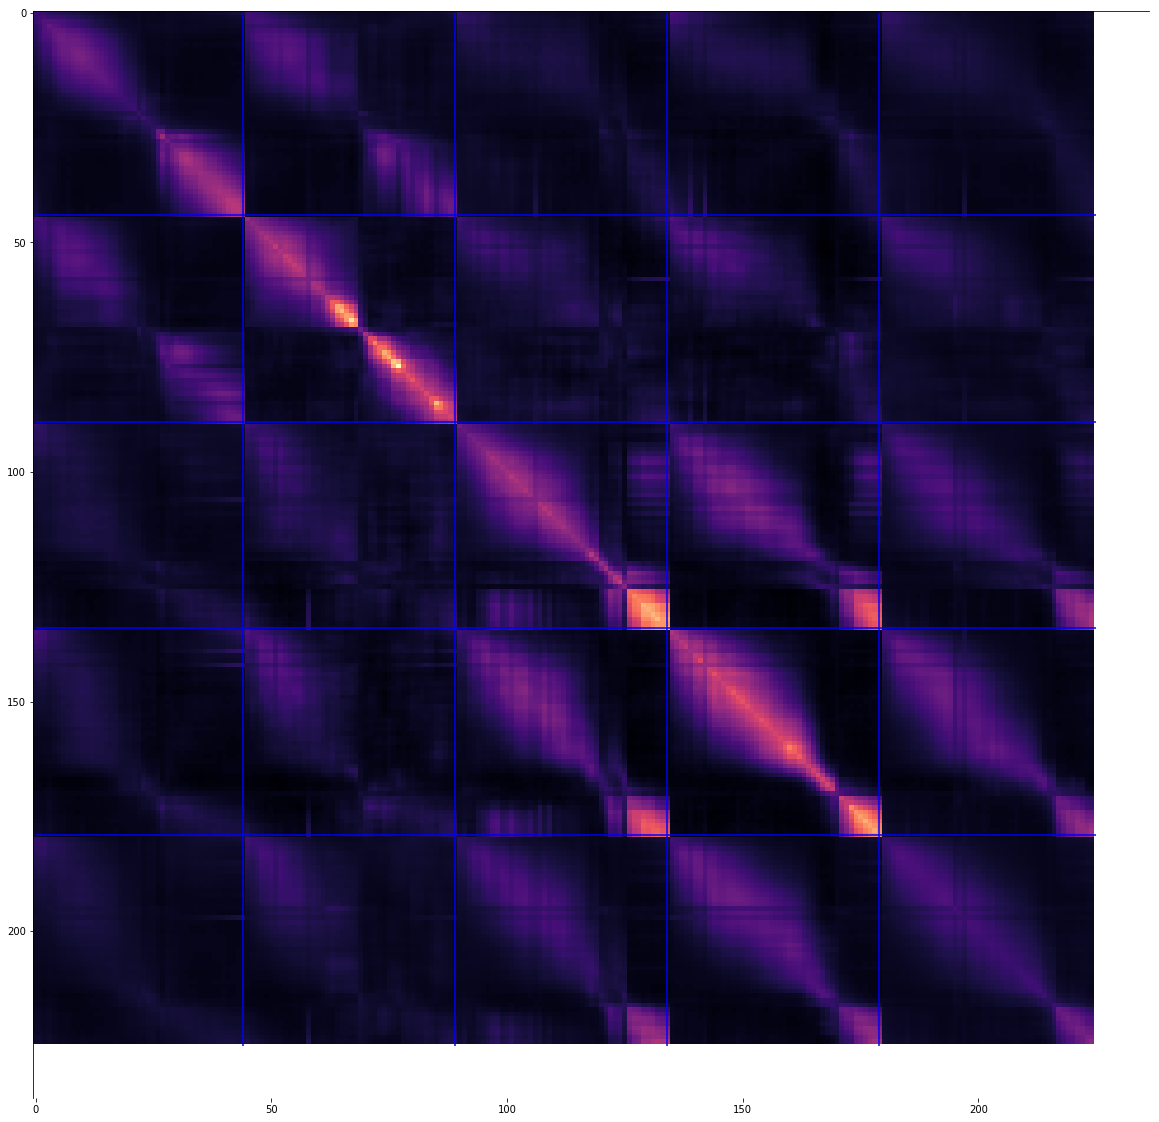

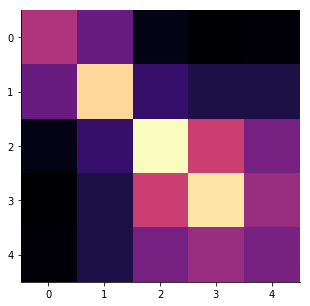

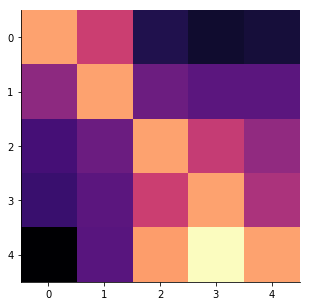

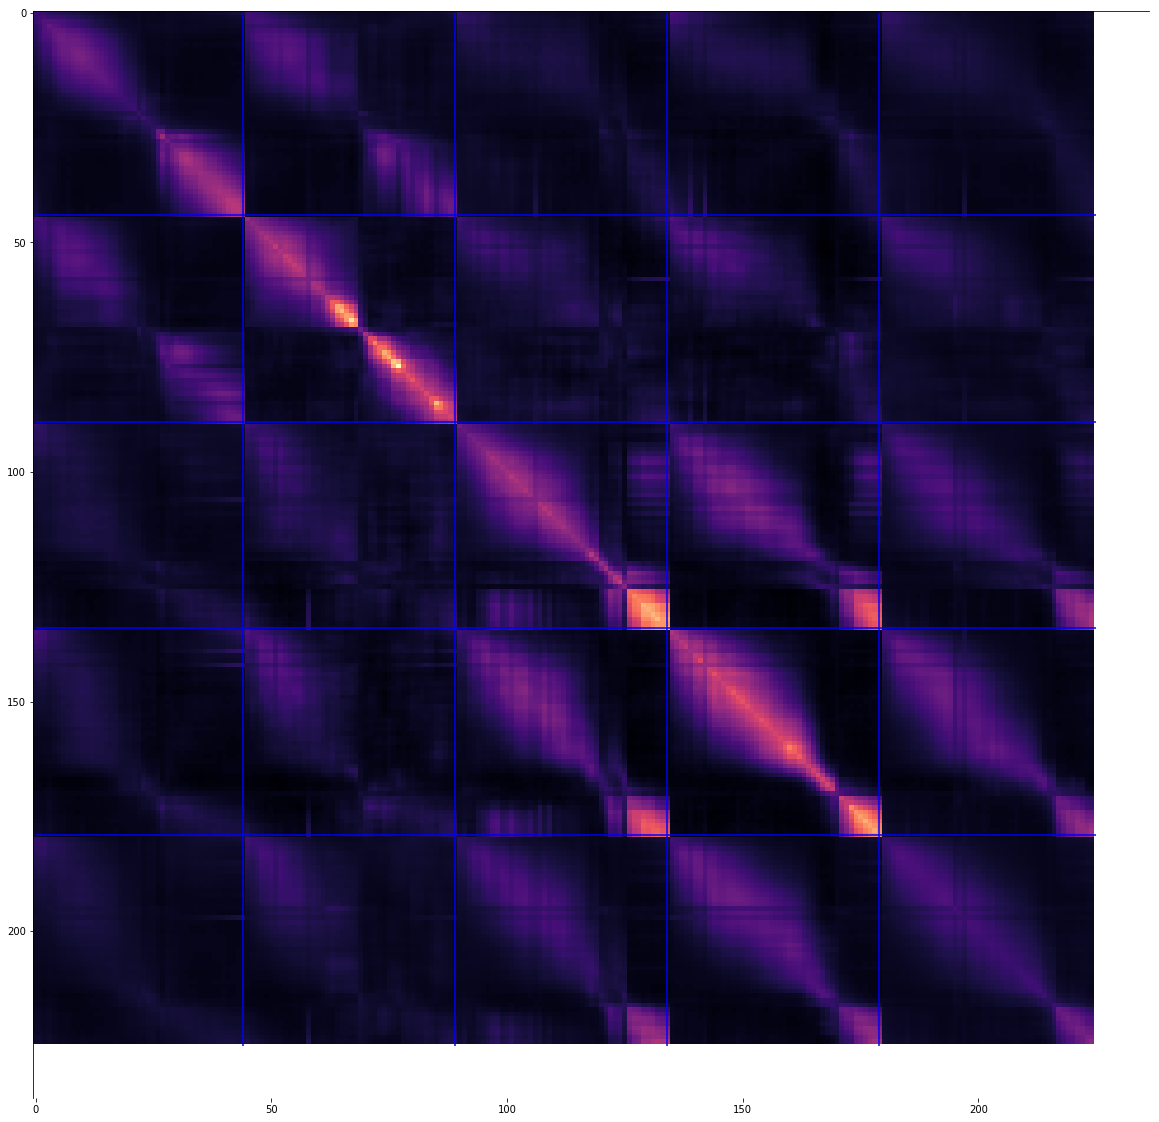

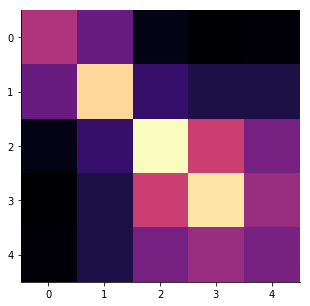

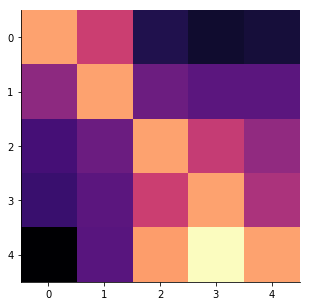

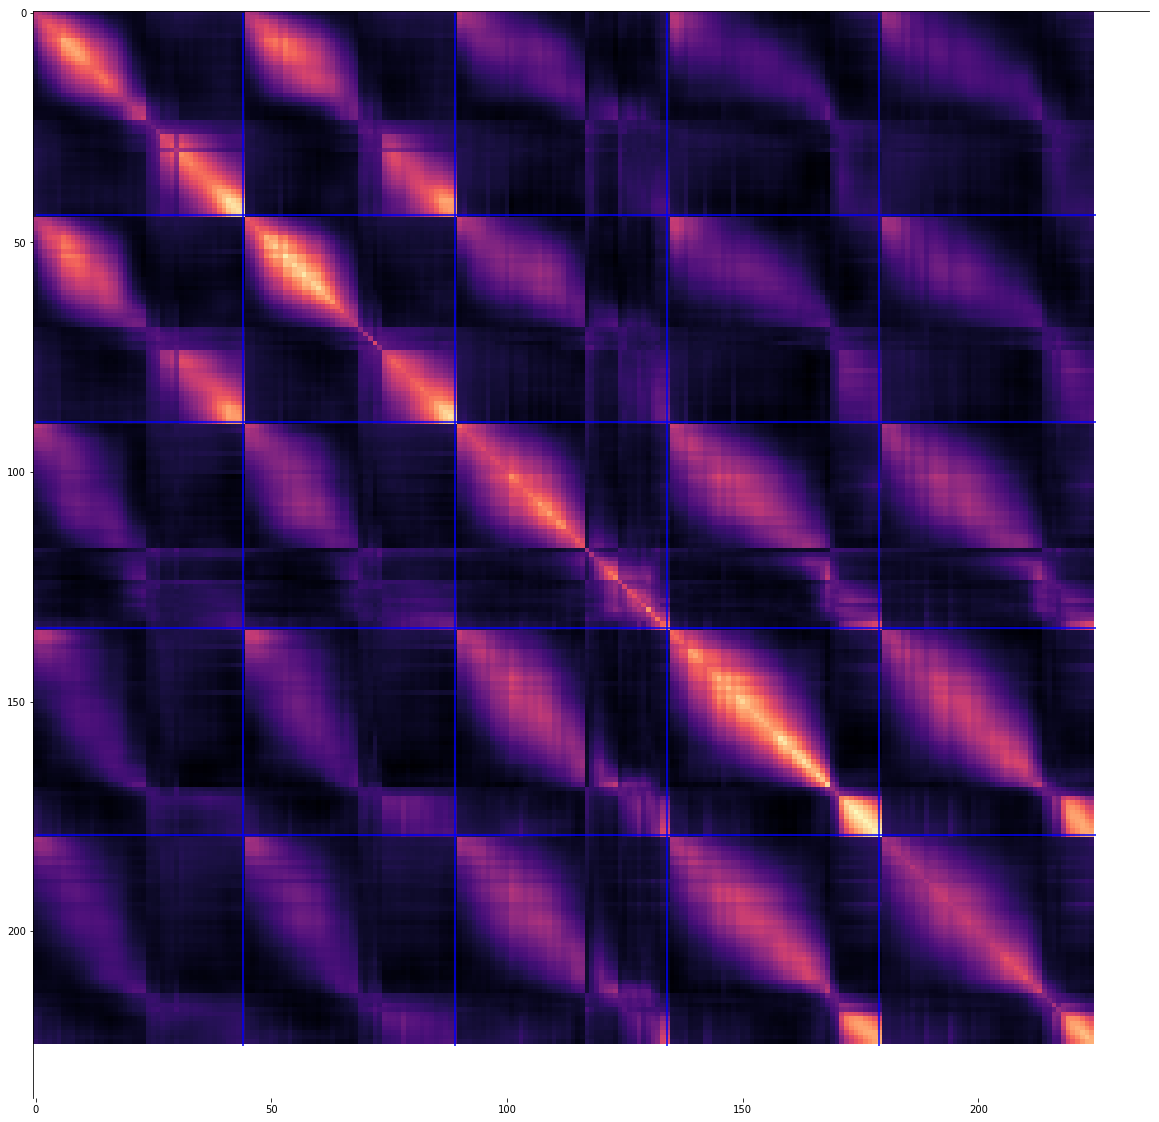

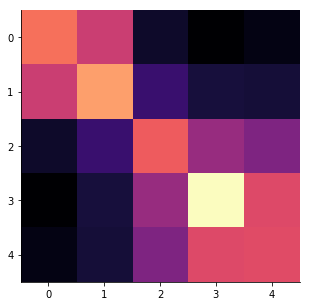

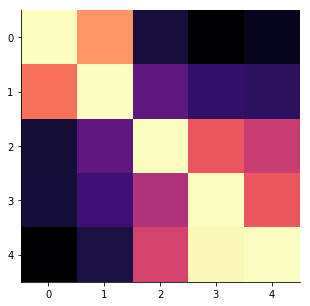

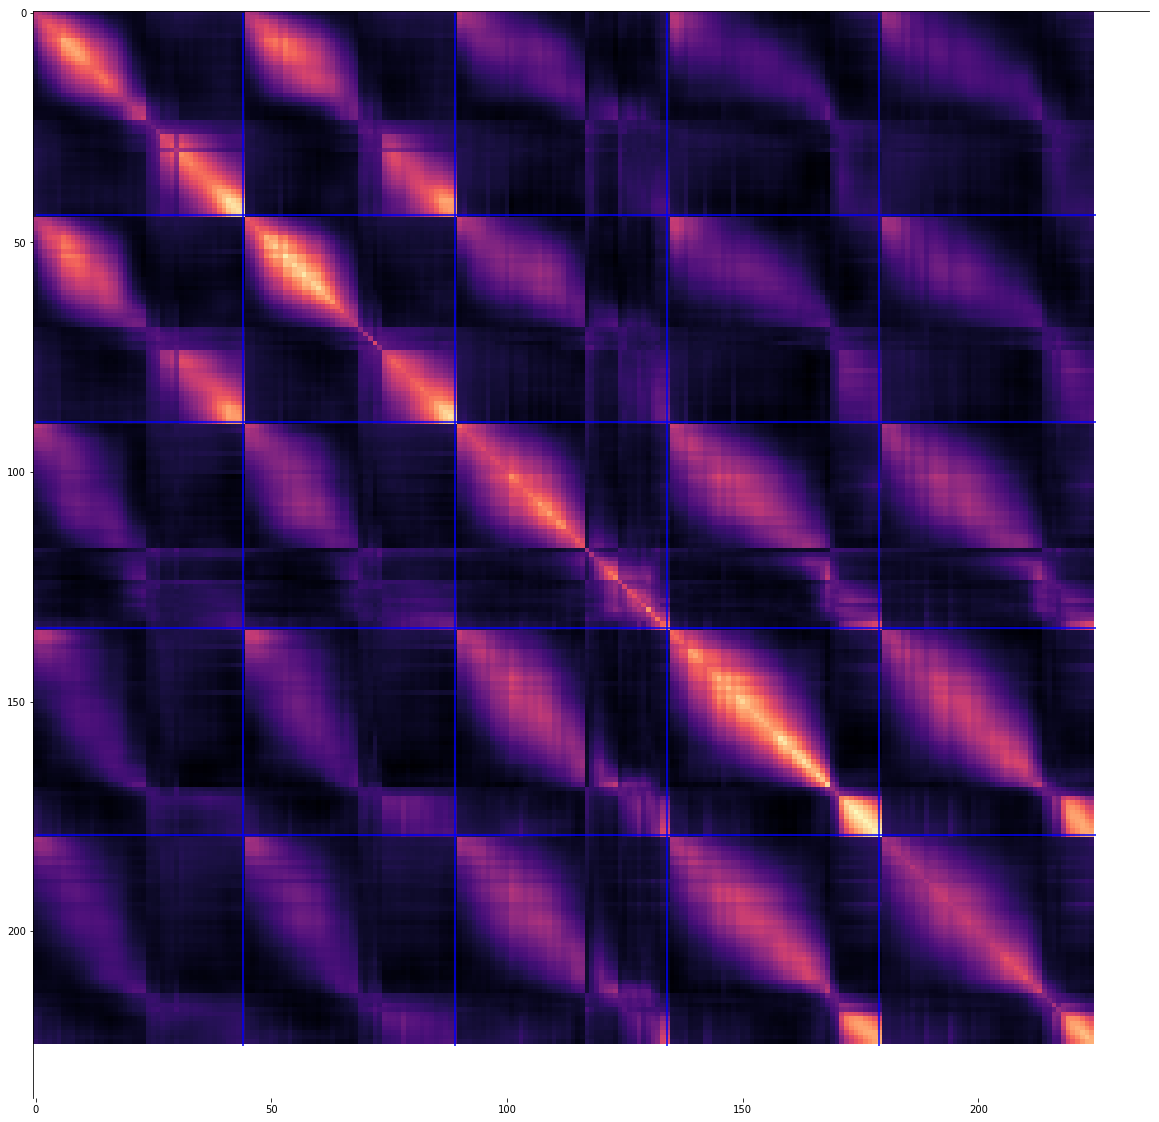

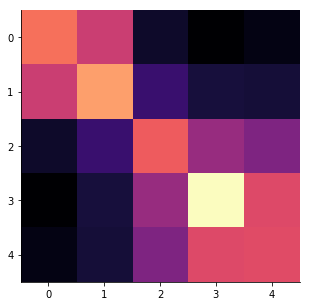

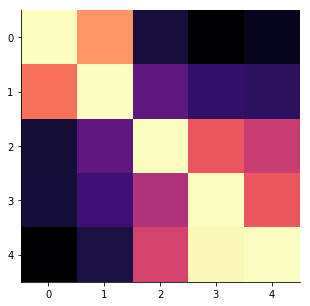

In [30]:
d_cm = {}
for mouse in ['4139190.1','4139190.3']:
    d_cm[mouse]={}
    print(mouse)
    # no timeeout 
    df_TO = df[df['Track']=='TwoTower_Timeout']
    df_TO = df_TO[df_TO['MouseName'].str.match(mouse)]
    #df_noTO = df_noTO.iloc[:7,:]
    #df_TO = df_TO[df_TO['DateTime']<'2018-06-19']
    # concatenate all files
    for i in range(df_TO.shape[0]):
        
        sess = df_TO.iloc[i]
        filestr = "%s_%s_%d_Ckz" % (sess['DateFolder'] , sess["Track"], sess["SessionNumber"])
        #print(sess)
        data_TO = behavior_dataframe(sess['data file'],scanmats=sess['scanmat'],concat=False)
        info = loadmat_sbx(sess['scanmat'])['info']
        ca_dat = load_ca_mat(sess['scanfile'])

        C = ca_dat['C_keep'][info['frame'][0]:info['frame'][-1]+1]
        S = ca_dat['S_dec'][info['frame'][0]:info['frame'][-1]+1]
        if C.shape[1]>200:
            d_cm[mouse][i]={}
            frame_diff = data_TO.shape[0]-C.shape[0]
            #print(frame_diff)
            if frame_diff>0:
                data_TO = data_TO.iloc[:-frame_diff]


            C_z = sp.stats.zscore(C,axis=0)
            S_z = sp.stats.zscore(S,axis=0)
            S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
            S_smooth = gaussian_filter1d(S,3,axis=0)

            simmat,cm,cm_norm=run_simmat(C_z,data_TO,save=True,fbase = "G:\\My Drive\\CommitteeMeeting8_18\\SimMats\\%s" % mouse,filestr=filestr)
            d_cm[mouse][i]['simmat'] = simmat
            d_cm[mouse][i]['cm'] = cm
            d_cm[mouse][i]['cm_norm'] = cm_norm

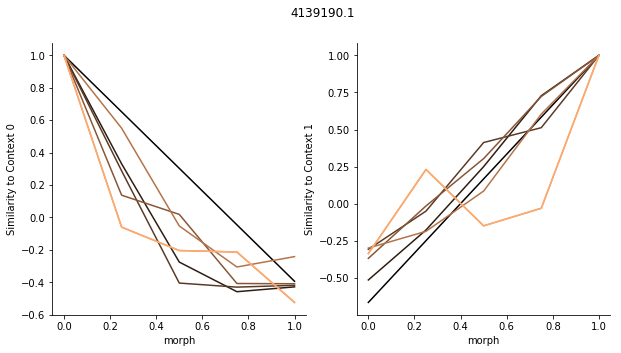

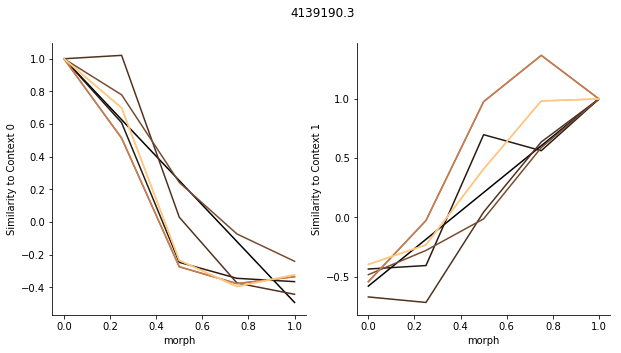

In [31]:
for mouse in d_cm.keys():
    f, ax = plt.subplots(1,2,figsize=[10,5])
    N = len(d_cm[mouse].keys())
    for sess in d_cm[mouse].keys():
        if len(d_cm[mouse][sess].keys())>0:
            cm_n = d_cm[mouse][sess]['cm_norm']
            
        
            ax[0].plot(np.linspace(0,1,num=cm_n.shape[0]),cm_n[0,:],color=plt.cm.copper(float(sess)/N))
            ax[0].set_xlabel('morph')
            ax[0].set_ylabel('Similarity to Context 0')
            ax[0].spines['right'].set_visible(False)
            ax[0].spines['top'].set_visible(False)
            
            ax[1].plot(np.linspace(0,1,num=cm_n.shape[0]),cm_n[-1,:],color=plt.cm.copper(float(sess)/N))
            ax[1].set_xlabel('morph')
            ax[1].set_ylabel('Similarity to Context 1')
            ax[1].spines['right'].set_visible(False)
            ax[1].spines['top'].set_visible(False)
    f.suptitle(mouse)
    f.savefig("G:\\My Drive\\CommitteeMeeting8_18\\SimMats\\%s_norm_summary_Ckz.png" % mouse, format='png')

In [18]:
data_TO = behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)

G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [19]:
# load calcium data
info = loadmat_sbx(sess['scanmat'])['info']
ca_dat = load_ca_mat(sess['scanfile'])

C = ca_dat['C_dec'][info['frame'][0]:info['frame'][-1]+1]
S = ca_dat['S_dec'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = data_TO.shape[0]-C.shape[0]
if frame_diff>0:
    data_TO = data_TO.iloc[:-frame_diff]
    
    
C_z = sp.stats.zscore(C,axis=0)
S_z = sp.stats.zscore(S,axis=0)
S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
S_smooth = gaussian_filter1d(S,3,axis=0)

G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


(45, 1599)
(45, 1599)
(45, 1599)
(45, 1599)
(45, 1599)


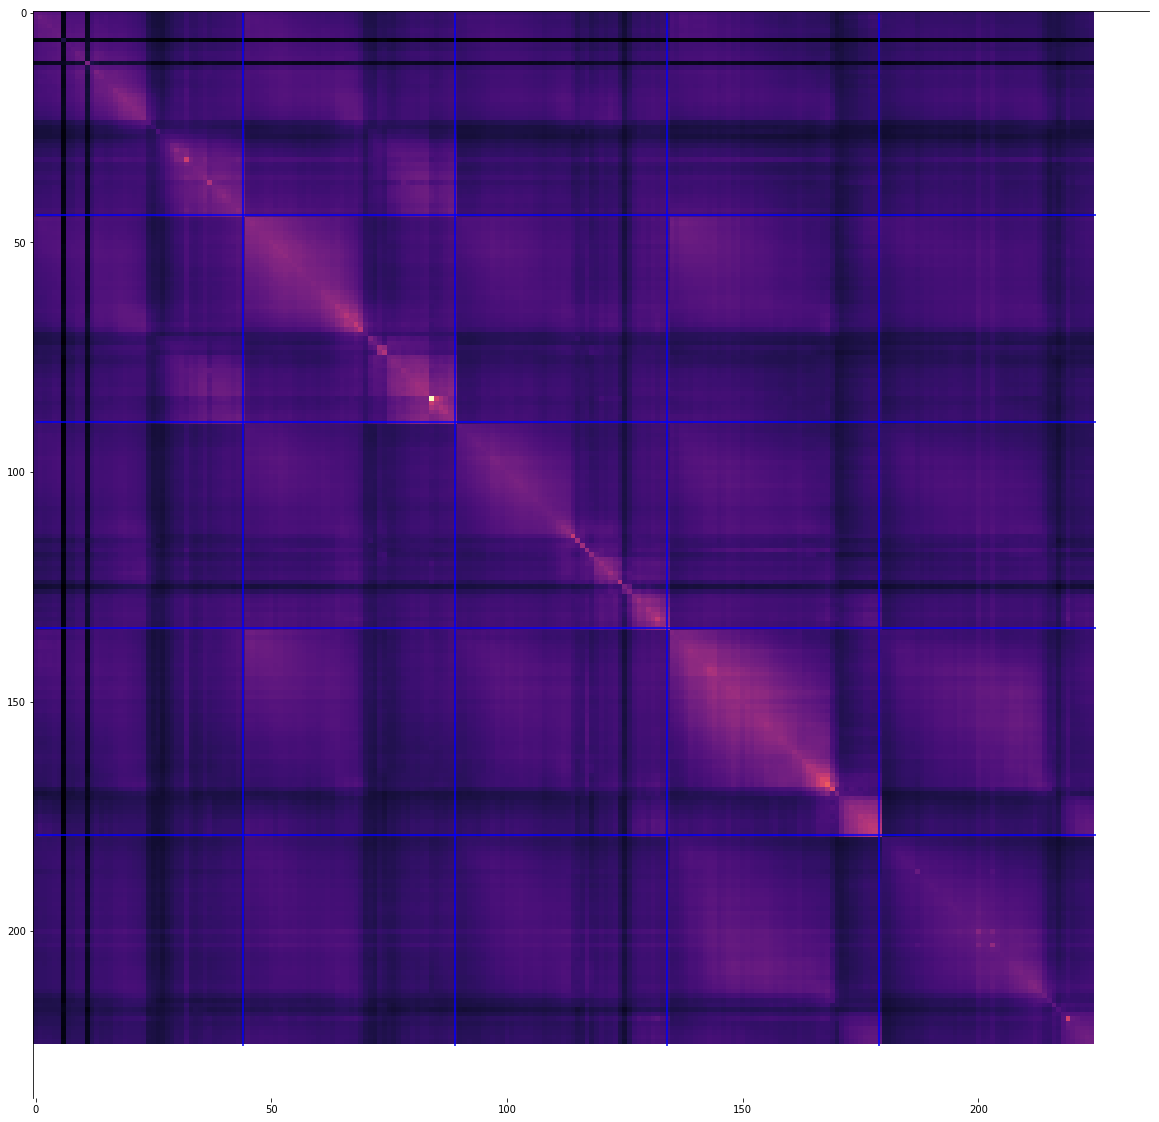

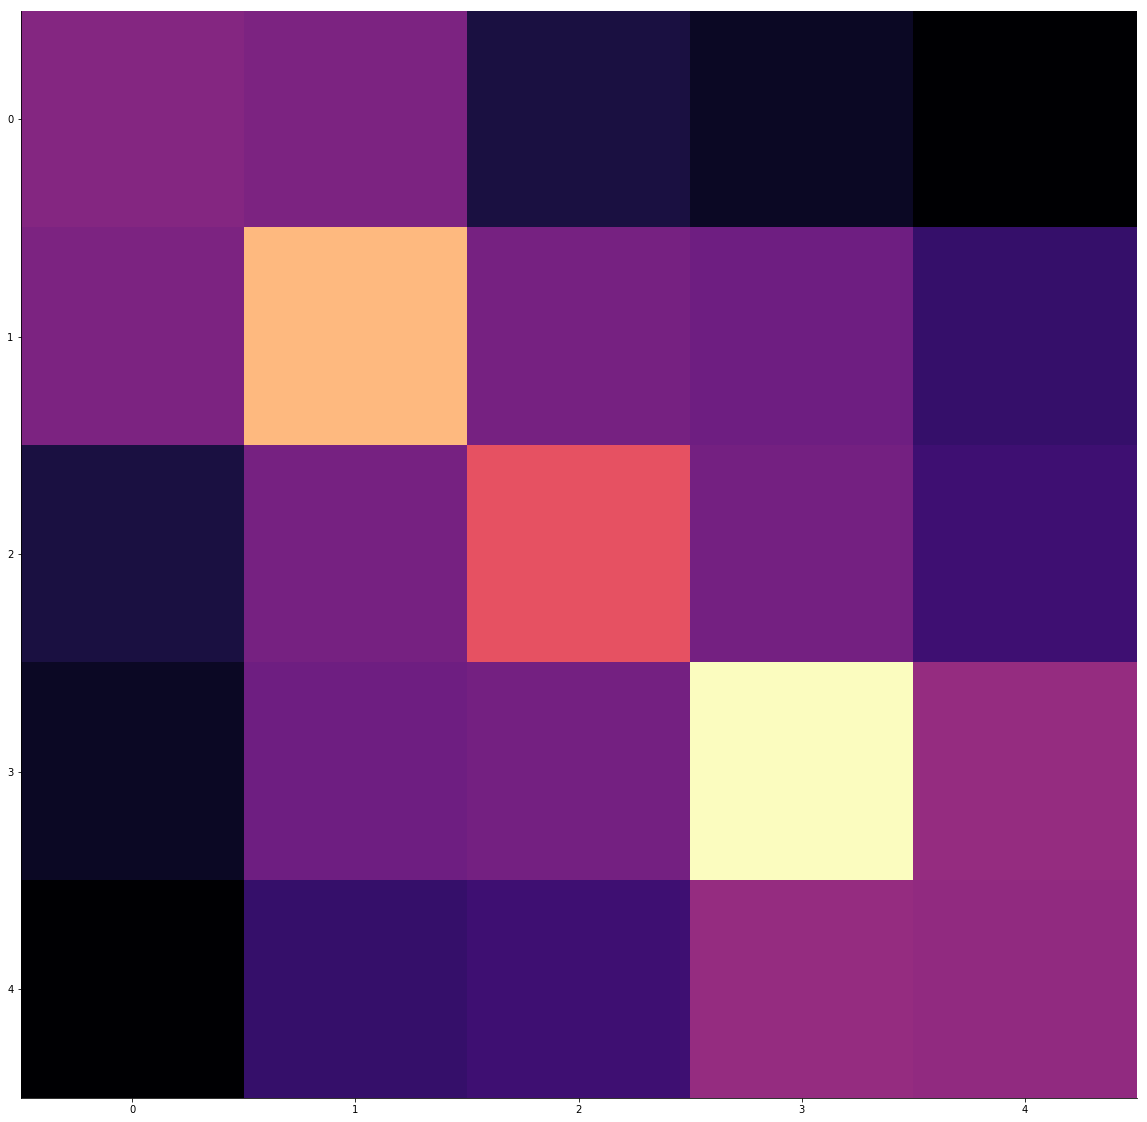

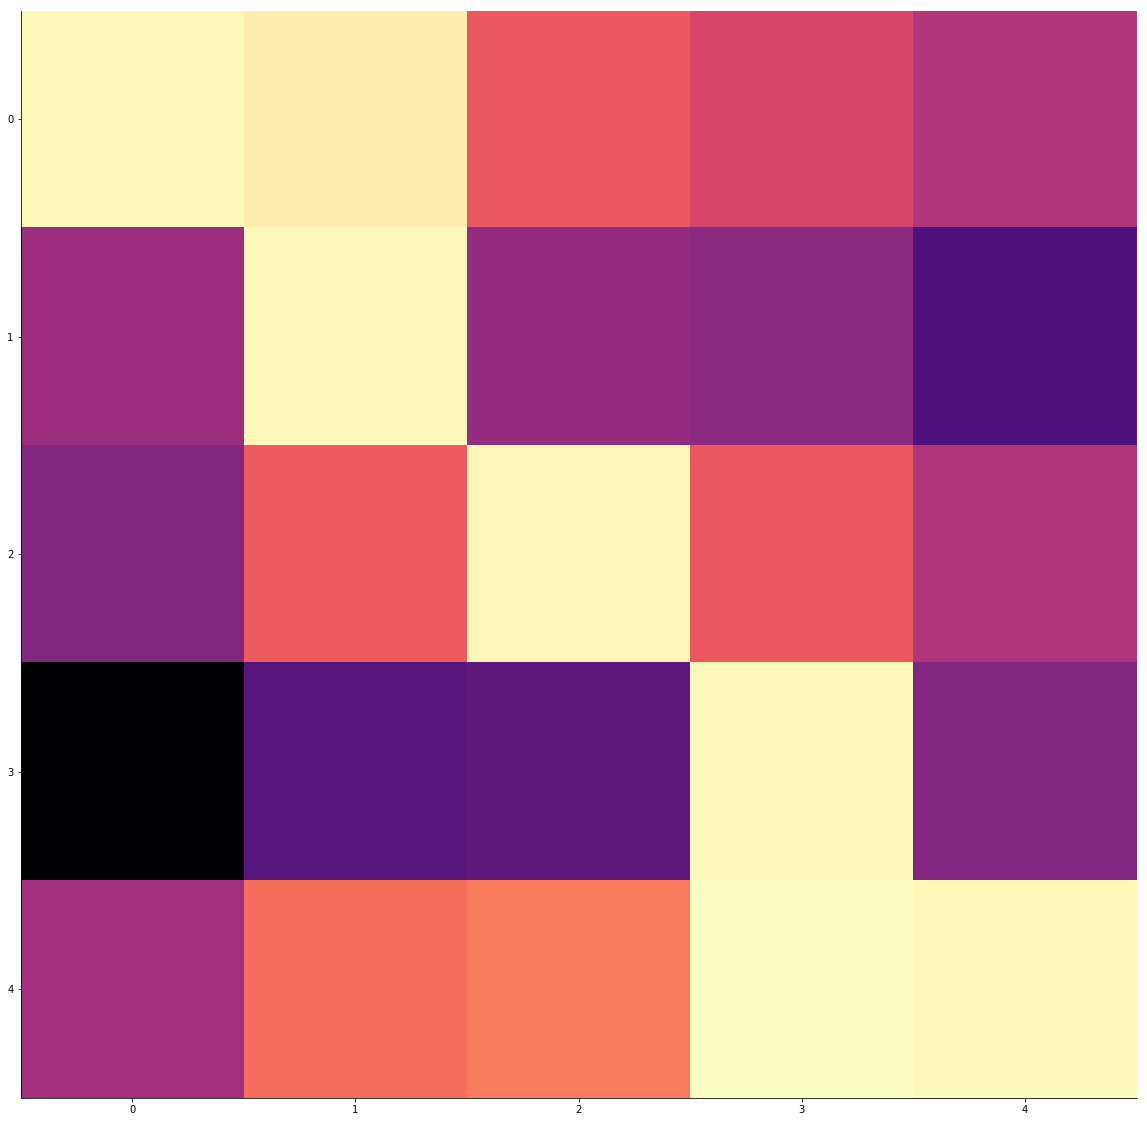

In [21]:
simmat,cm,cm_norm=run_simmat(C,data_TO,save=False,fbase = None,filestr=None)